In [118]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [119]:
data_heatmap = pd.read_csv('../datasets/A_data_heatmap_300x250_3p.csv')
data_heatmap

Unnamed: 0   domain  grid_id  click_x  click_y  display_height  \
0                 0  ID_1763   333519      179        4             250   
1                 1  ID_1763   333519      262      185             250   
2                 2  ID_1763   333519      122      188             250   
3                 3  ID_1763   333519      263      197             250   
4                 4  ID_1763   333519      242      159             250   
...             ...      ...      ...      ...      ...             ...   
1935421     1935421  ID_1501   333519      163      145             250   
1935422     1935422  ID_1501   333519       41      139             250   
1935423     1935423  ID_1501   333519      213       97             250   
1935424     1935424  ID_1501   333519      271      245             250   
1935425     1935425  ID_1501   333519      136      107             250   

         display_width  clicks  
0                  300       1  
1                  300       1  
2                  300       1  
3                  300       1  
4                  300       1  
...                ...     ...  
1935421            300       8  
1935422            300       4  
1935423            300       2  
1935424            300       1  
1935425            300       8  

[1935426 rows x 8 columns]

In [120]:
# expand so that each row corresponds to 1 click:
data_heatmap_expanded = data_heatmap.loc[data_heatmap.index.repeat(data_heatmap['clicks'])].reset_index(drop=True)
data_heatmap_expanded['clicks'] = 1 

In [ ]:
# Binning clicks in nr_of_x_bins, nr_of_y_bins:

NR_OF_X_BINS = 61
NR_OF_Y_BINS = 51

max_width = data_heatmap['display_width'].max()
max_height = data_heatmap['display_height'].max()

width_bins = np.linspace(1, max_width, NR_OF_X_BINS)
height_bins = np.linspace(1, max_height, NR_OF_Y_BINS)

width_bins_max = len(width_bins)-2 # start at 0
height_bins_max = len(height_bins)-2

data_heatmap_expanded['click_x_bin'] = pd.cut(data_heatmap_expanded['click_x'], 
                                      bins   = width_bins, 
                                      labels = False, 
                                      include_lowest = True)

data_heatmap_expanded['click_y_bin'] = pd.cut(data_heatmap_expanded['click_y'], 
                                      bins = height_bins, 
                                      labels = False, 
                                      include_lowest = True)


aggregated_clicks = data_heatmap_expanded.groupby(['grid_id',
                                           'domain', 
                                           'click_x_bin', 
                                           'click_y_bin']).size().reset_index(name='clicks_sum')


KeyboardInterrupt: 

In [ ]:
cb_333519 = ['ID_1184', 'ID_1281', 'ID_1305', 'ID_1353', 'ID_1448', 'ID_1522',
       'ID_1544', 'ID_162', 'ID_1682', 'ID_1690', 'ID_1824', 'ID_1888',
       'ID_1929', 'ID_2076', 'ID_2097', 'ID_2226', 'ID_2249', 'ID_2268',
       'ID_2331', 'ID_2339', 'ID_2386', 'ID_2396', 'ID_2438', 'ID_258',
       'ID_2609', 'ID_2680', 'ID_2863', 'ID_2883', 'ID_2908', 'ID_3061',
       'ID_3243', 'ID_3250', 'ID_3314', 'ID_3382', 'ID_3397', 'ID_3402',
       'ID_3420', 'ID_3459', 'ID_3470', 'ID_3540', 'ID_398', 'ID_409',
       'ID_484', 'ID_489', 'ID_526', 'ID_549', 'ID_580', 'ID_665',
       'ID_810', 'ID_84', 'ID_857', 'ID_86', 'ID_905', 'ID_927', 'ID_934',
       'ID_962', 'ID_986', 'ID_10', 'ID_1077', 'ID_1178', 'ID_1203', 'ID_1246', 
       'ID_1262', 'ID_1671', 'ID_1691', 'ID_1999', 'ID_2198', 'ID_2495', 
       'ID_2569', 'ID_2619', 'ID_3180', 'ID_3308', 'ID_394', 'ID_678', 'ID_793']

cb_333346 = ['ID_1247', 'ID_162', 'ID_2534', 'ID_2742', 'ID_526', 'ID_2201',
       'ID_1165', 'ID_743', 'ID_199', 'ID_2145', 'ID_2569', 'ID_643',
       'ID_1305', 'ID_3180', 'ID_3158', 'ID_136', 'ID_293', 'ID_1753',
       'ID_1849', 'ID_2226', 'ID_1462', 'ID_626', 'ID_2863', 'ID_3243',
       'ID_3250', 'ID_1708', 'ID_1238', 'ID_580', 'ID_84', 'ID_2568',
       'ID_2340', 'ID_1803', 'ID_3470', 'ID_139', 'ID_2619', 'ID_2908',
       'ID_1281', 'ID_3308', 'ID_2883', 'ID_1320', 'ID_1333', 'ID_1062',
       'ID_149', 'ID_260', 'ID_599', 'ID_1513', 'ID_3402', 'ID_1888',
       'ID_2972', 'ID_398', 'ID_2339', 'ID_1030', 'ID_3382', 'ID_2076',
       'ID_1646', 'ID_1077', 'ID_10', 'ID_1153', 'ID_1533', 'ID_2609',
       'ID_1214', 'ID_810', 'ID_2097', 'ID_2386', 'ID_1585', 'ID_549',
       'ID_3420', 'ID_3397', 'ID_2006', 'ID_561', 'ID_1542', 'ID_1570',
       'ID_1819', 'ID_1413', 'ID_1240', 'ID_793', 'ID_831', 'ID_3188',
       'ID_1437', 'ID_556', 'ID_1134', 'ID_314', 'ID_2836', 'ID_1483',
       'ID_2676', 'ID_665', 'ID_15', 'ID_2755', 'ID_2194', 'ID_1682',
       'ID_2775', 'ID_1923', 'ID_1846', 'ID_1262', 'ID_3314', 'ID_1448',
       'ID_1770', 'ID_2626', 'ID_3296', 'ID_489', 'ID_1963', 'ID_1268',
       'ID_1568', 'ID_1094', 'ID_2267', 'ID_409', 'ID_1650', 'ID_1522',
       'ID_927', 'ID_2302', 'ID_1929', 'ID_1435', 'ID_1353', 'ID_1071', 
       'ID_1246', 'ID_1300', 'ID_1358', 'ID_1614', 'ID_1894', 'ID_1999', 
       'ID_2142', 'ID_2198', 'ID_2274', 'ID_2331', 'ID_2400', 'ID_2438', 
       'ID_2495', 'ID_2710', 'ID_2808', 'ID_3197', 'ID_3335', 'ID_418', 
       'ID_657', 'ID_773', 'ID_906', 'ID_962']

In [ ]:
def plot_anomaly(n_rows, n_cols, anomaly, aggregated_clicks):
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 12))  # Adjust the figure size as needed
    fig.subplots_adjust(hspace=0.4, wspace=0.4)  # Adjust spacing between plots

    plot_count = 0

    for grid, domain in anomaly:
        ex = aggregated_clicks[(aggregated_clicks.grid_id == grid) &
                            (aggregated_clicks.domain == domain)]
        if len(ex) == 0: # skips the entries that are not in heatmap data 
            continue

        click_matrix = ex.pivot("click_y_bin", "click_x_bin", "clicks_sum").fillna(0)
        
        if plot_count == n_rows * n_cols:  # Check if the figure is full
            #plt.savefig(f'heatmap_combined_{idx}.png', bbox_inches='tight')  # Save current figure
            plt.show()
            fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 12))  # Start a new figure
            fig.subplots_adjust(hspace=0.4, wspace=0.4)
            plot_count = 0  # Reset plot count for the new figure

        row = plot_count // n_cols
        col = plot_count % n_cols
        
        ax = axes[row, col]
        sns.heatmap(click_matrix, 
                    cmap="YlGnBu", 
                    annot=False, 
                    cbar=True, 
                    fmt="g", 
                    ax=ax)
        ax.set_title(f'grid = {grid} and domain = {domain}')
        ax.set_xlabel('click_x Bin')
        ax.set_ylabel('click_y Bin')
        ax.invert_yaxis()
        
        plot_count += 1

    if plot_count > 0:
    #    plt.savefig(f'heatmap_combined_final.png', bbox_inches='tight')
        plt.show()

In [ ]:
# 333519
cluster_333519 = {
      'c1': ['ID_1184', 'ID_1353', 'ID_162', 'ID_1682', 'ID_1824', 'ID_1888', 'ID_1929', 'ID_2076', 'ID_2226', 'ID_2268', 
            'ID_2331', 'ID_2438', 'ID_258', 'ID_2680', 'ID_3250', 'ID_3397', 'ID_1671'], # all over the place
      'c2': ['ID_1281', 'ID_1305', 'ID_1544', 'ID_3243', 'ID_3382', 'ID_3402', 'ID_3459', 'ID_398', 'ID_549', 'ID_580', 
             'ID_810', 'ID_905', 'ID_986', 'ID_10', 'ID_1077', 'ID_1178', 'ID_1203', 'ID_1262', 'ID_1691', 'ID_1999', 
             'ID_2198', 'ID_2495', 'ID_2569', 'ID_2619', 'ID_3180', 'ID_394', 'ID_678', 'ID_793'], # left bottom corner
      'c3': ['ID_1690', 'ID_2249', 'ID_2908', 'ID_3470', 'ID_3540', 'ID_409', 'ID_484', 'ID_489', 'ID_86', 'ID_927', 
             'ID_934', 'ID_1246', 'ID_3308'], # right bottom corner
      'c4': ['ID_1448', 'ID_1522', 'ID_2609', 'ID_2863', 'ID_2883', 'ID_3314', 'ID_857'], # bottom middle
      'c5': ['ID_2339', 'ID_2386'], # right middle
      'c6': ['ID_962'] # top right corner
}

# 'ID_2097', 'ID_2396', 'ID_3061', 'ID_3420', 'ID_526', 'ID_665', 'ID_84' # undefined

#333346
cluster_333346 = {
      'c1': ['ID_1247', 'ID_199', 'ID_2226', 'ID_1462', 'ID_1320', 'ID_1333', 'ID_149', 'ID_1513', 'ID_1888', 'ID_1153', 
            'ID_549', 'ID_3397', 'ID_1413', 'ID_2676', 'ID_2775', 'ID_1650', 'ID_2438'], # all over the place
      'c2': ['ID_2742', 'ID_526', 'ID_2569', 'ID_3180', 'ID_1753', 'ID_3243', 'ID_1238', 'ID_580', 'ID_84', 'ID_2619', 
            'ID_1281', 'ID_3402', 'ID_398', 'ID_1030', 'ID_3382', 'ID_1077', 'ID_10', 'ID_810', 'ID_561', 'ID_1240', 
            'ID_793', 'ID_1437', 'ID_556', 'ID_1483', 'ID_1262', 'ID_1435', 'ID_1999', 'ID_2198', 'ID_2495'], # left bottom corner
      'c7': ['ID_2534', 'ID_2201', 'ID_2145', 'ID_3158', 'ID_139', 'ID_1646', 'ID_1533', 'ID_2755'], # all over left side
      'c4': ['ID_1165', 'ID_643', 'ID_1305', 'ID_293', 'ID_2883', 'ID_260', 'ID_2609', 'ID_1214', 'ID_1542', 'ID_1570', 
            'ID_1819', 'ID_831', 'ID_1134', 'ID_2836', 'ID_3314', 'ID_1448', 'ID_1568', 'ID_1094', 'ID_2400'], # mid bottom
      'c8': ['ID_743', 'ID_2568', 'ID_1062', 'ID_2626'], # Diagonal 
      'c3': ['ID_1803', 'ID_3470', 'ID_3308', 'ID_2006', 'ID_1894', 'ID_3197', 'ID_3335', 'ID_906', 'ID_1708', 'ID_2908', 
            'ID_489', 'ID_409', 'ID_927', 'ID_1071', 'ID_1246', 'ID_1358', 'ID_1614', 'ID_2142', 'ID_2331', 'ID_2710', 'ID_2808'] # right bottom corner 44-50
}

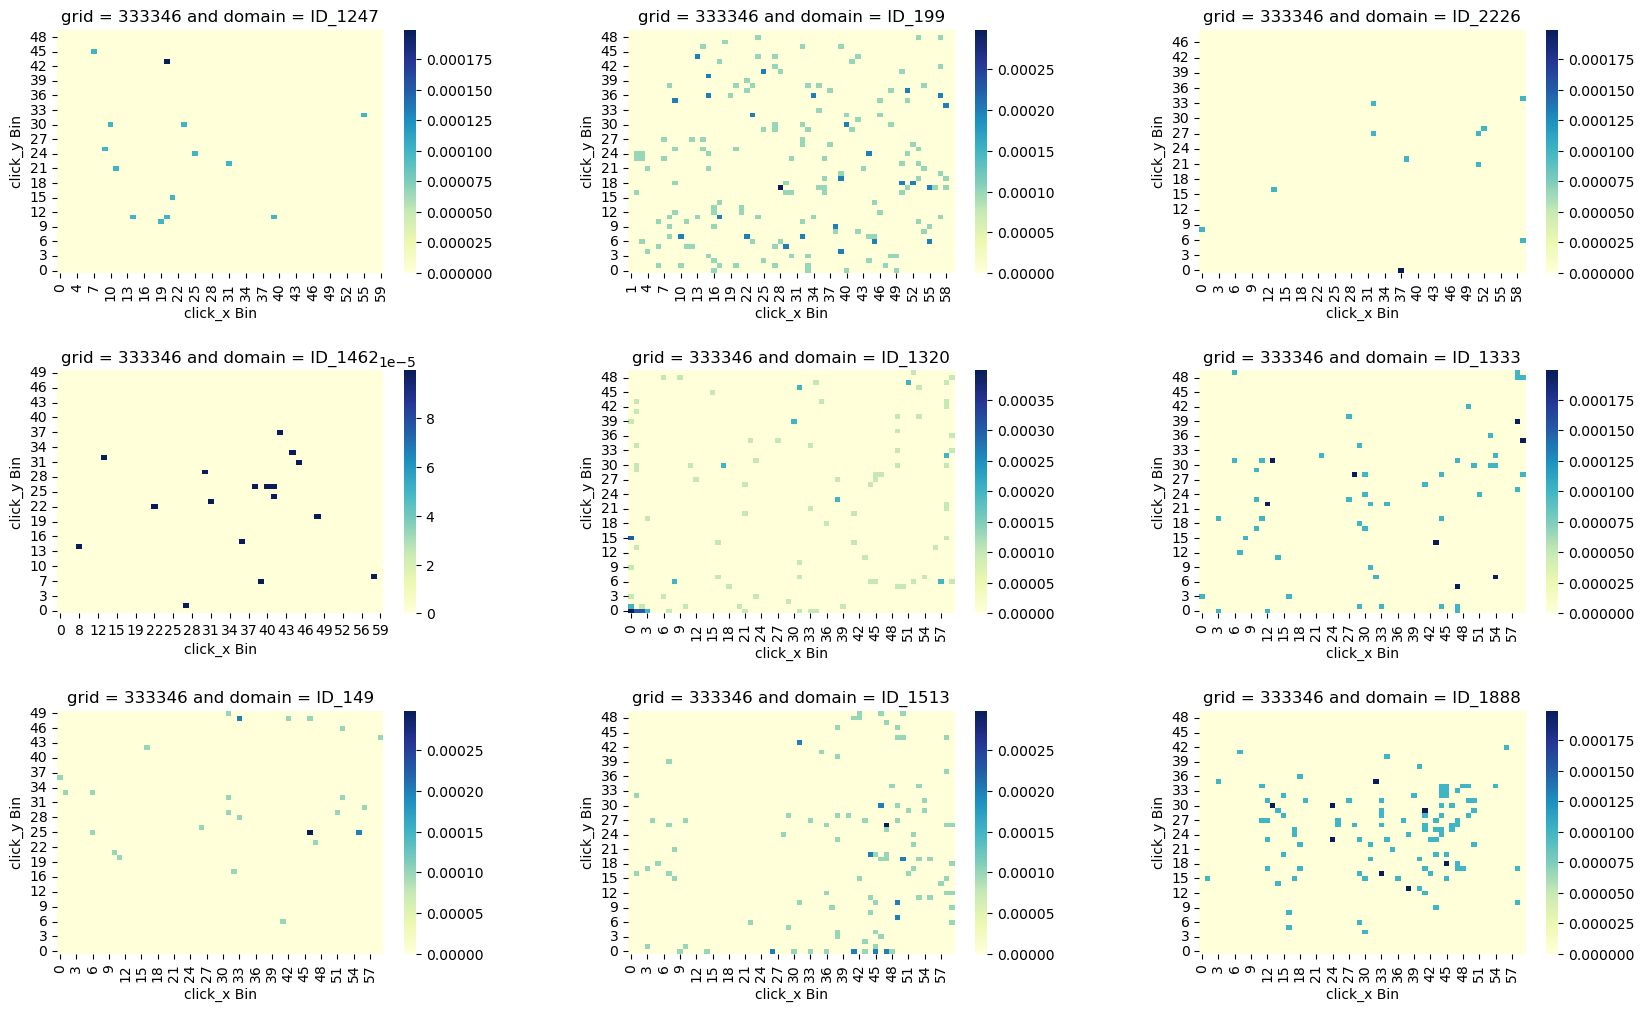

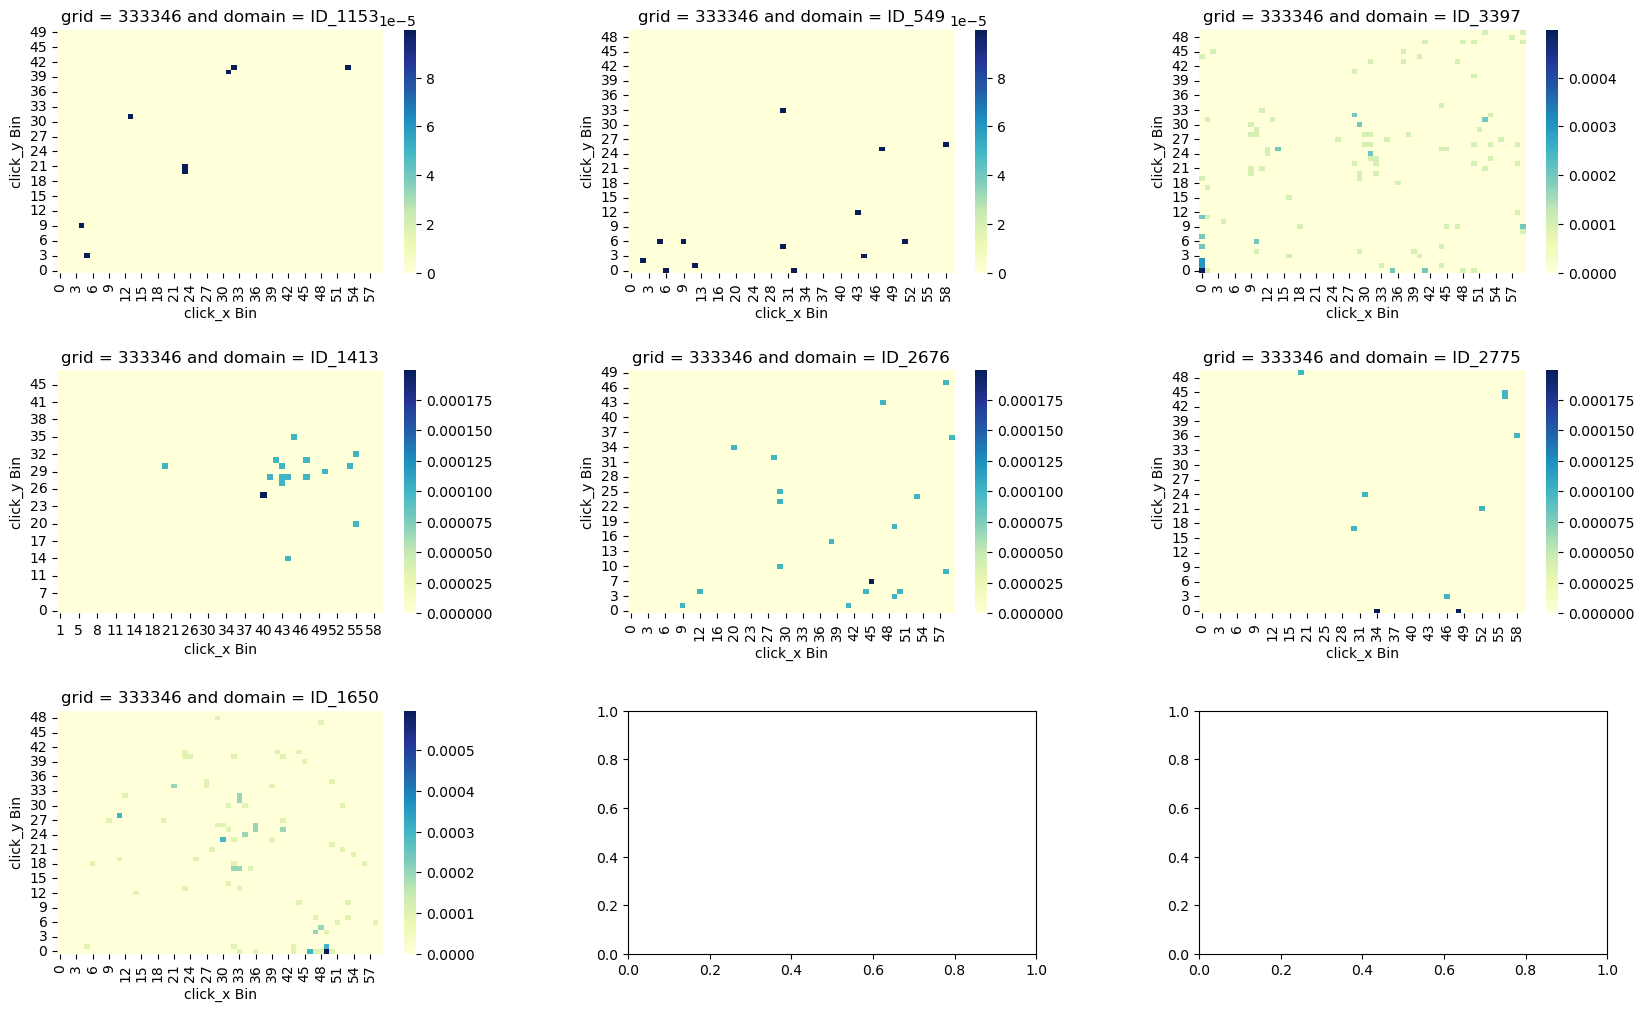

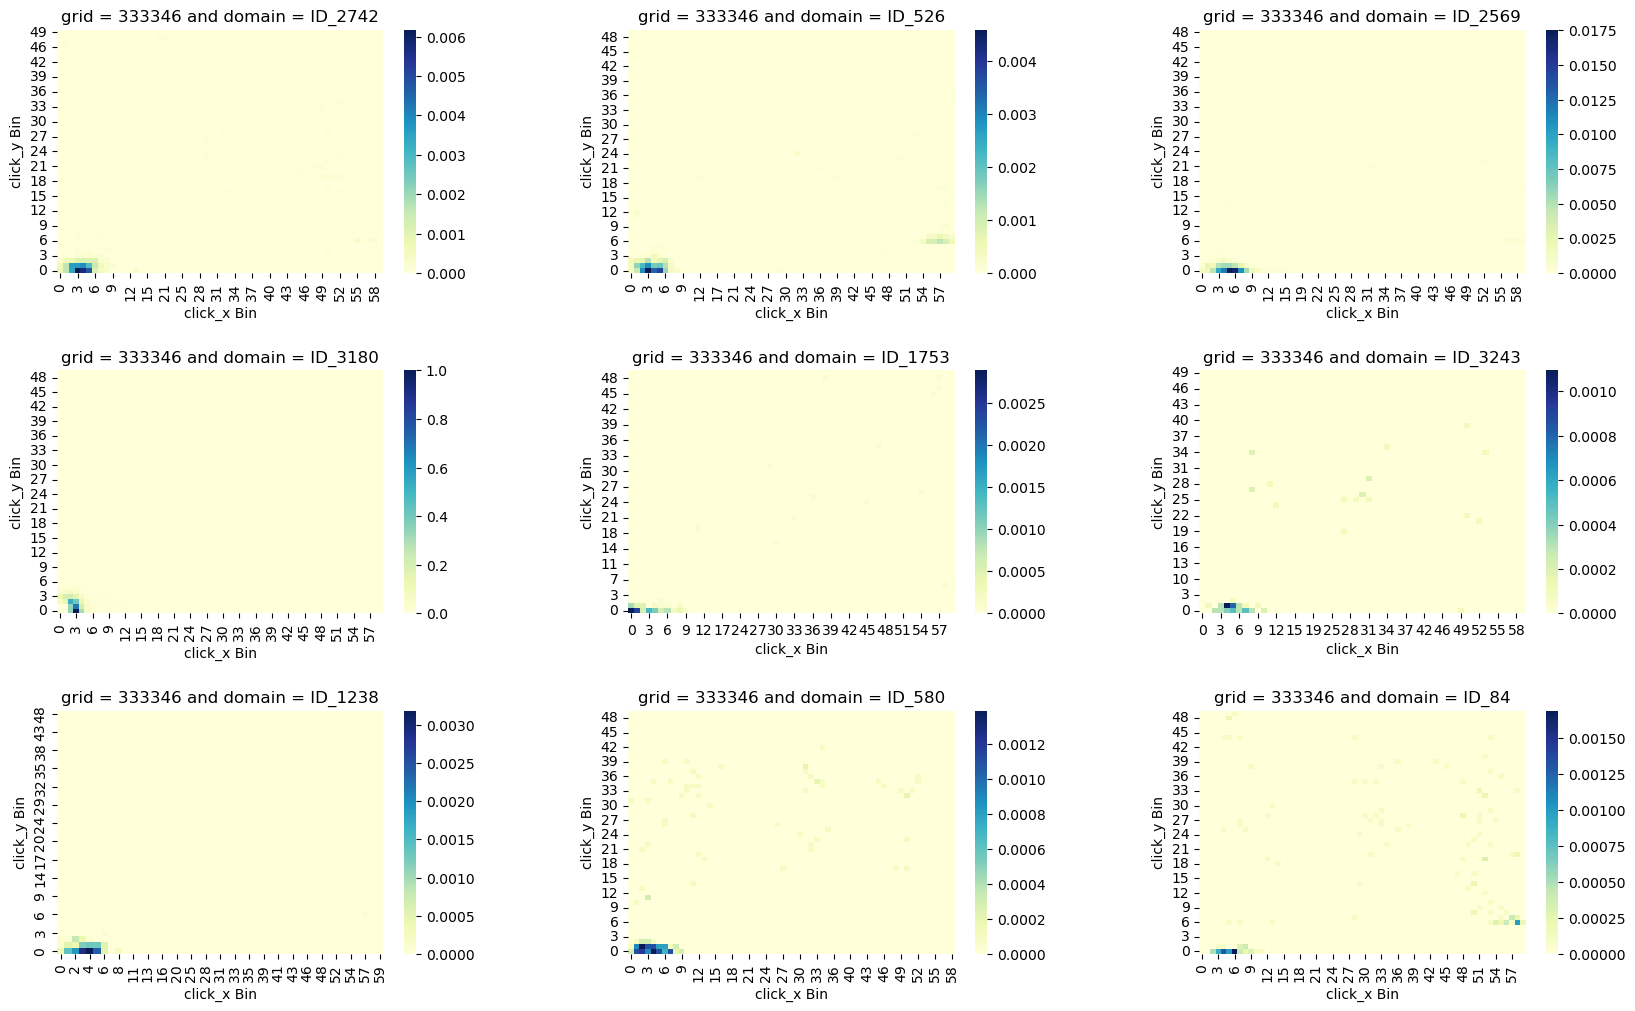

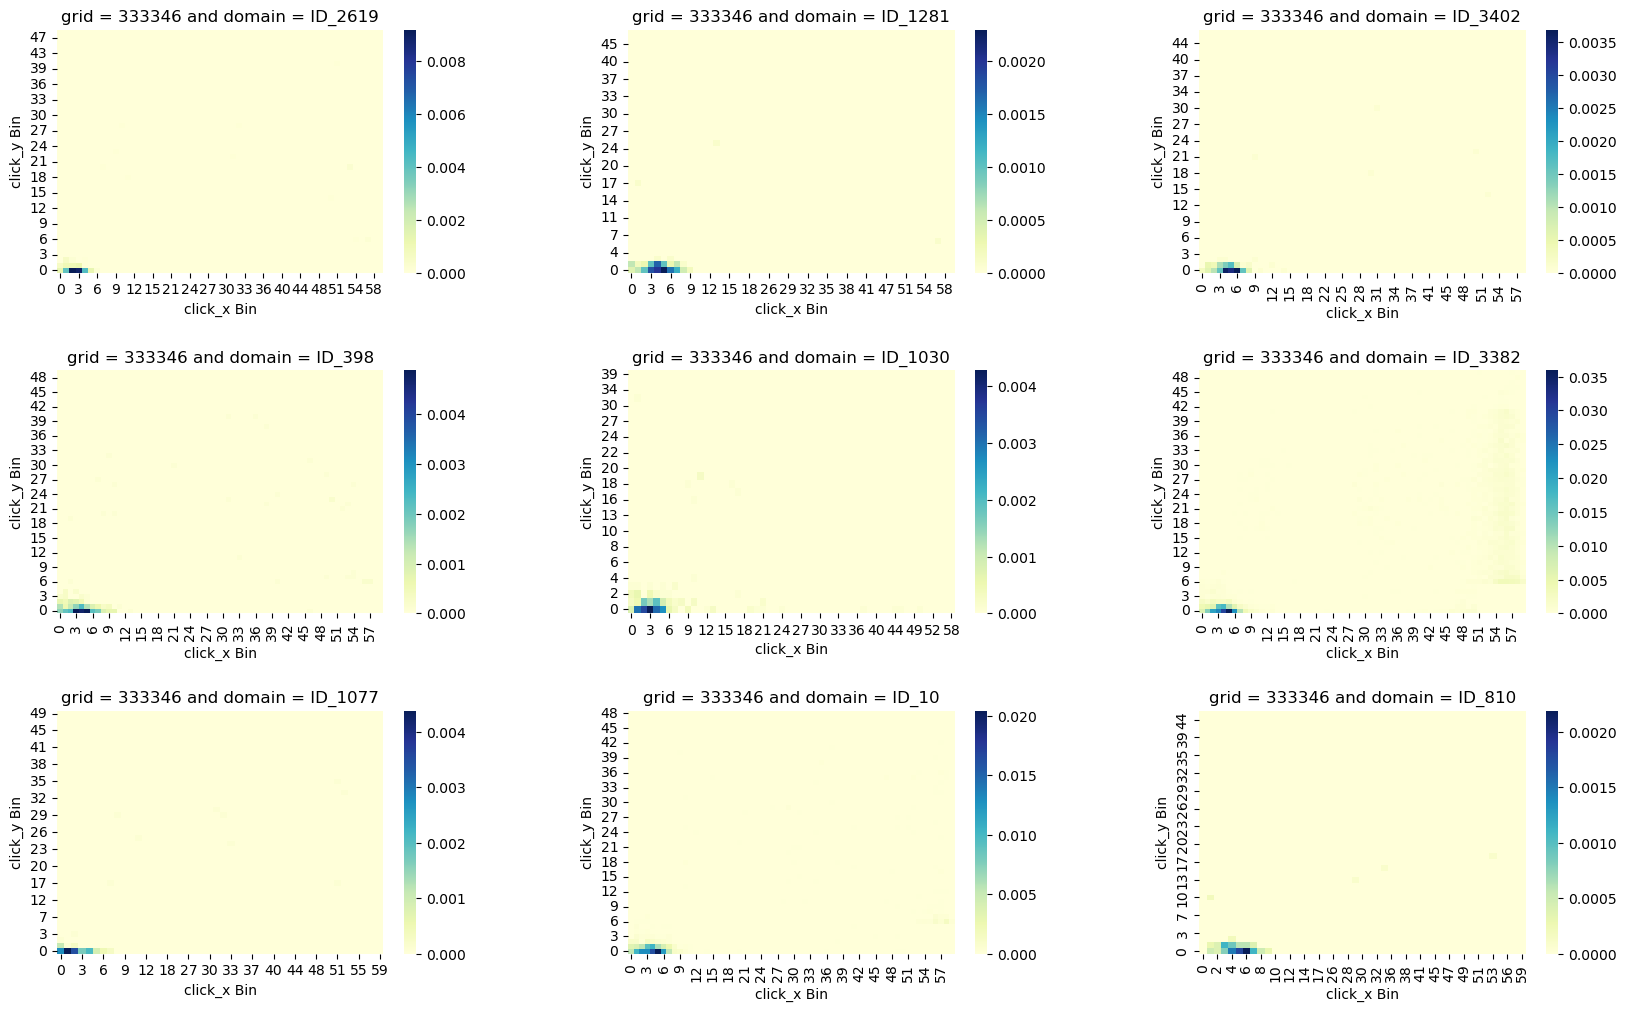

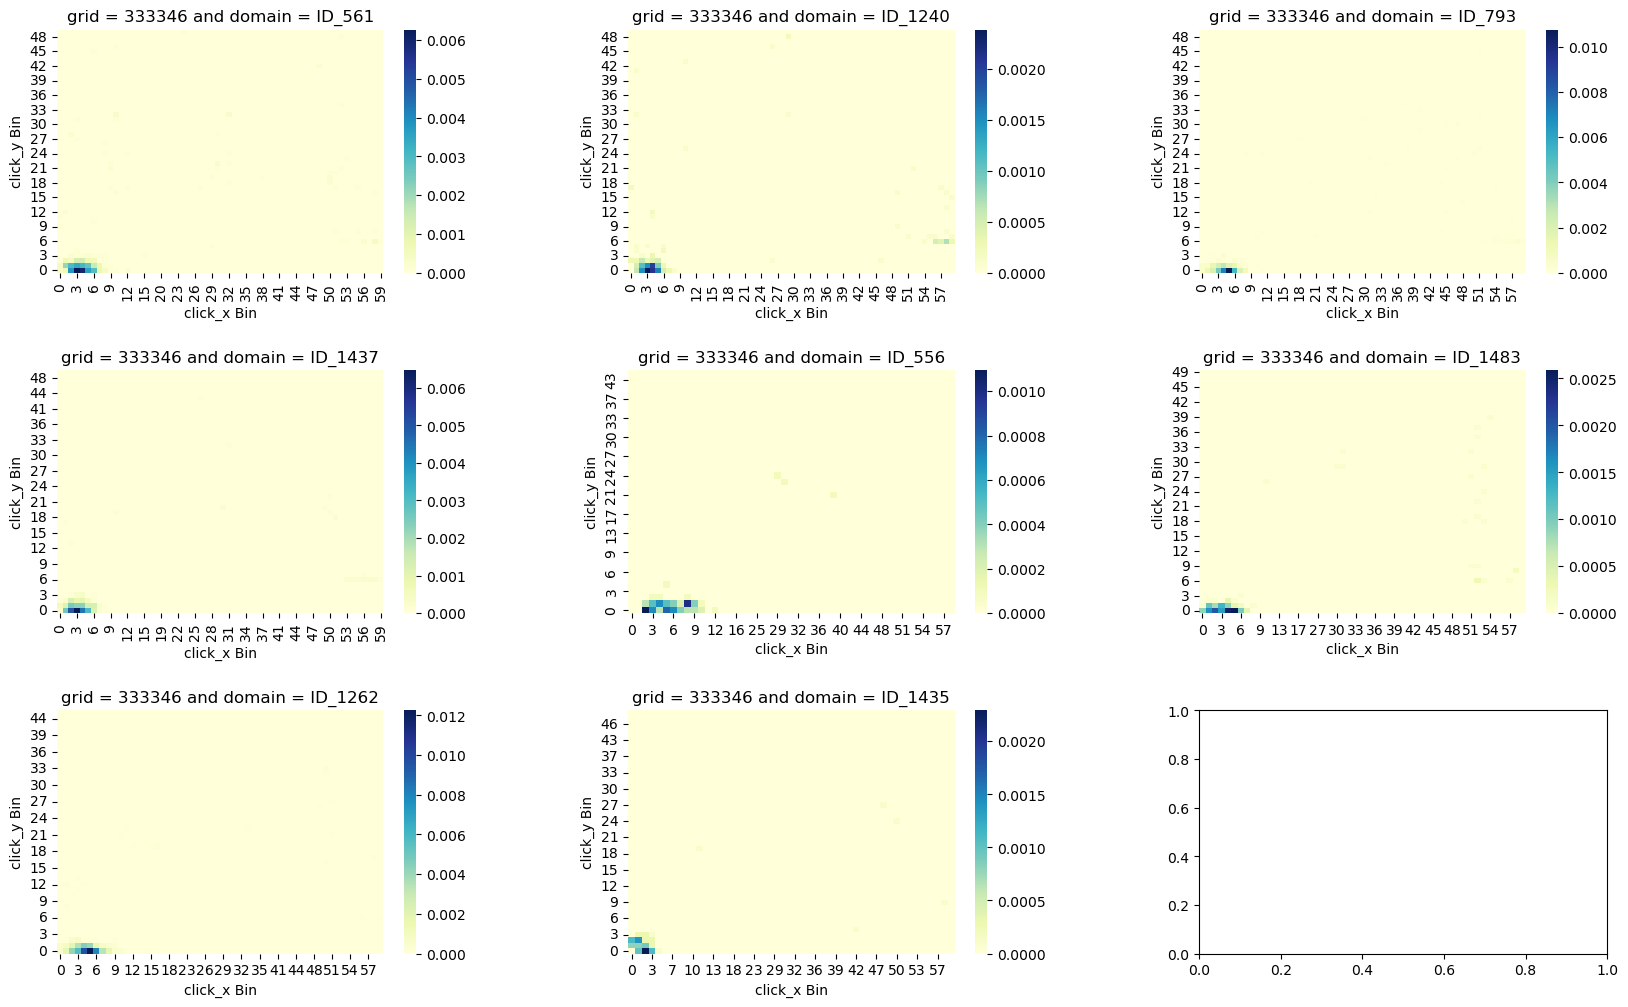

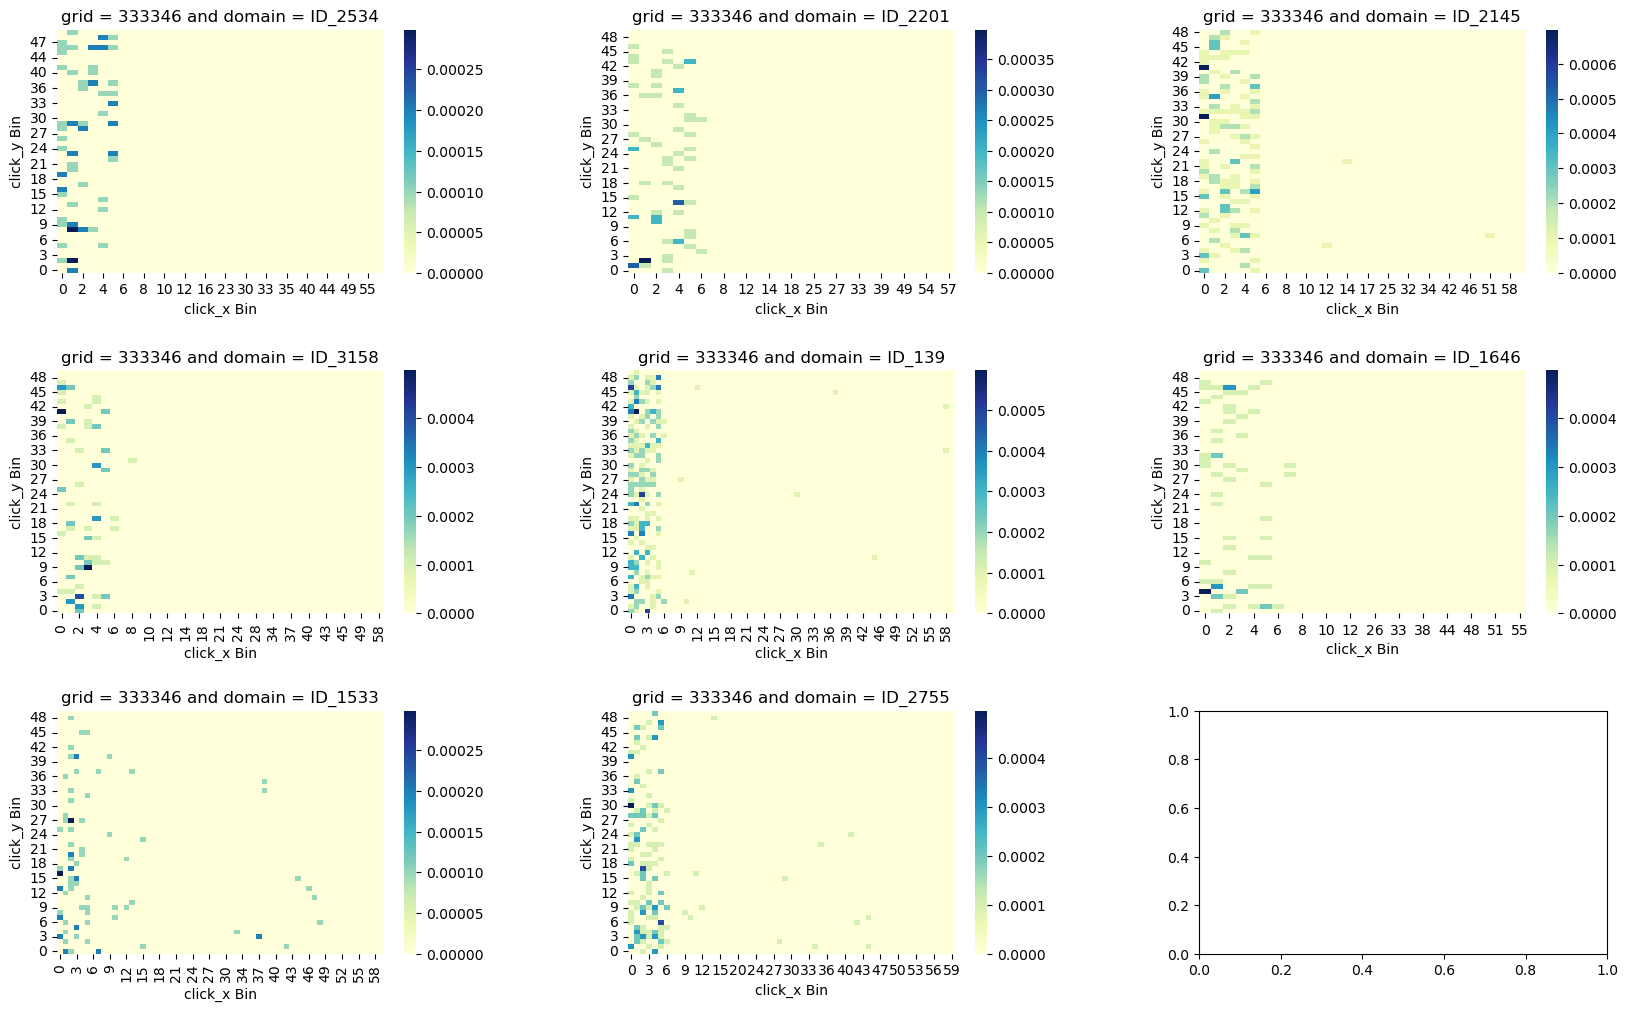

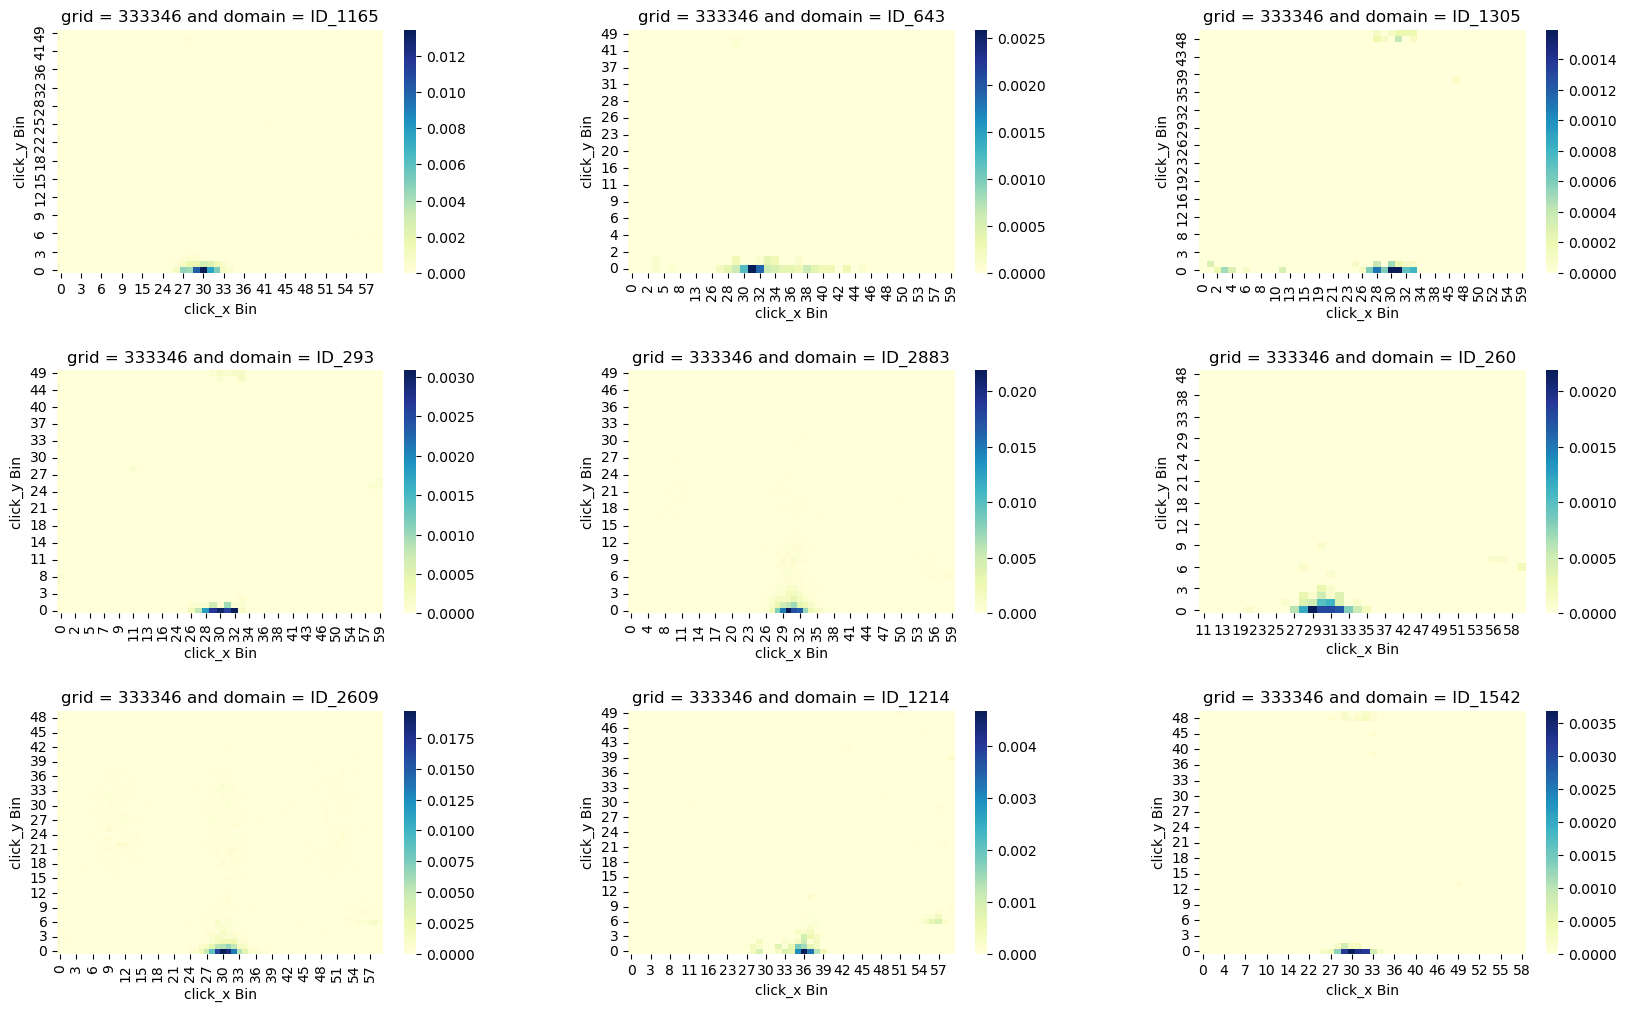

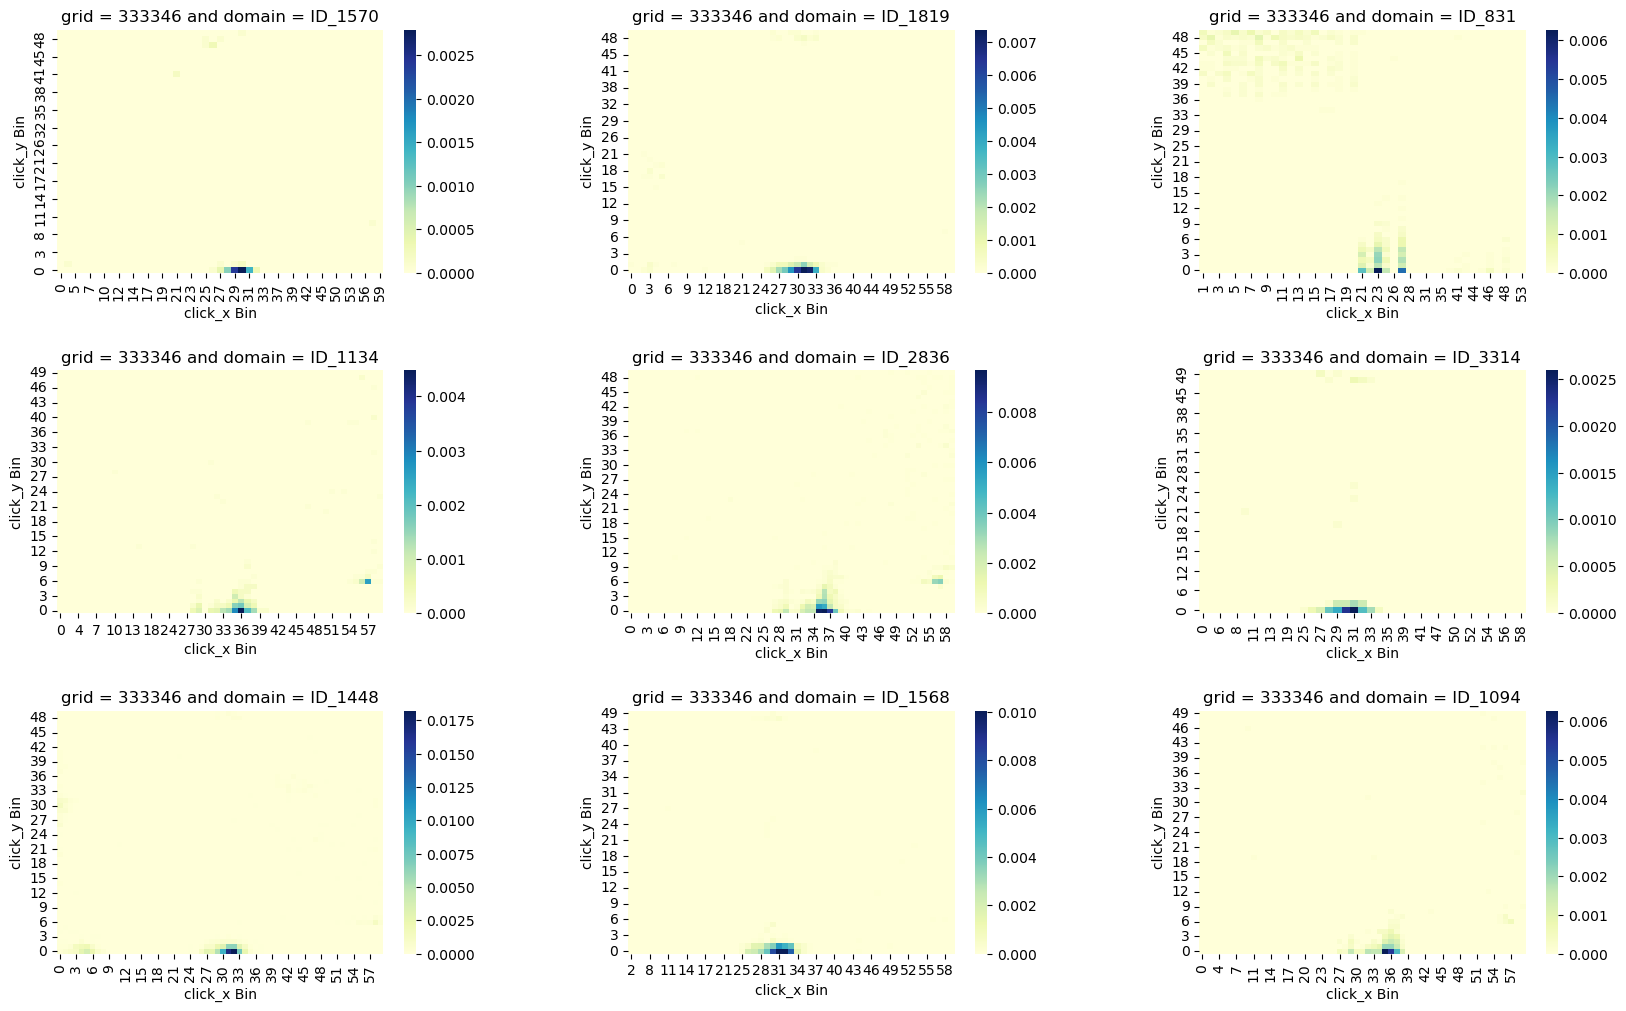

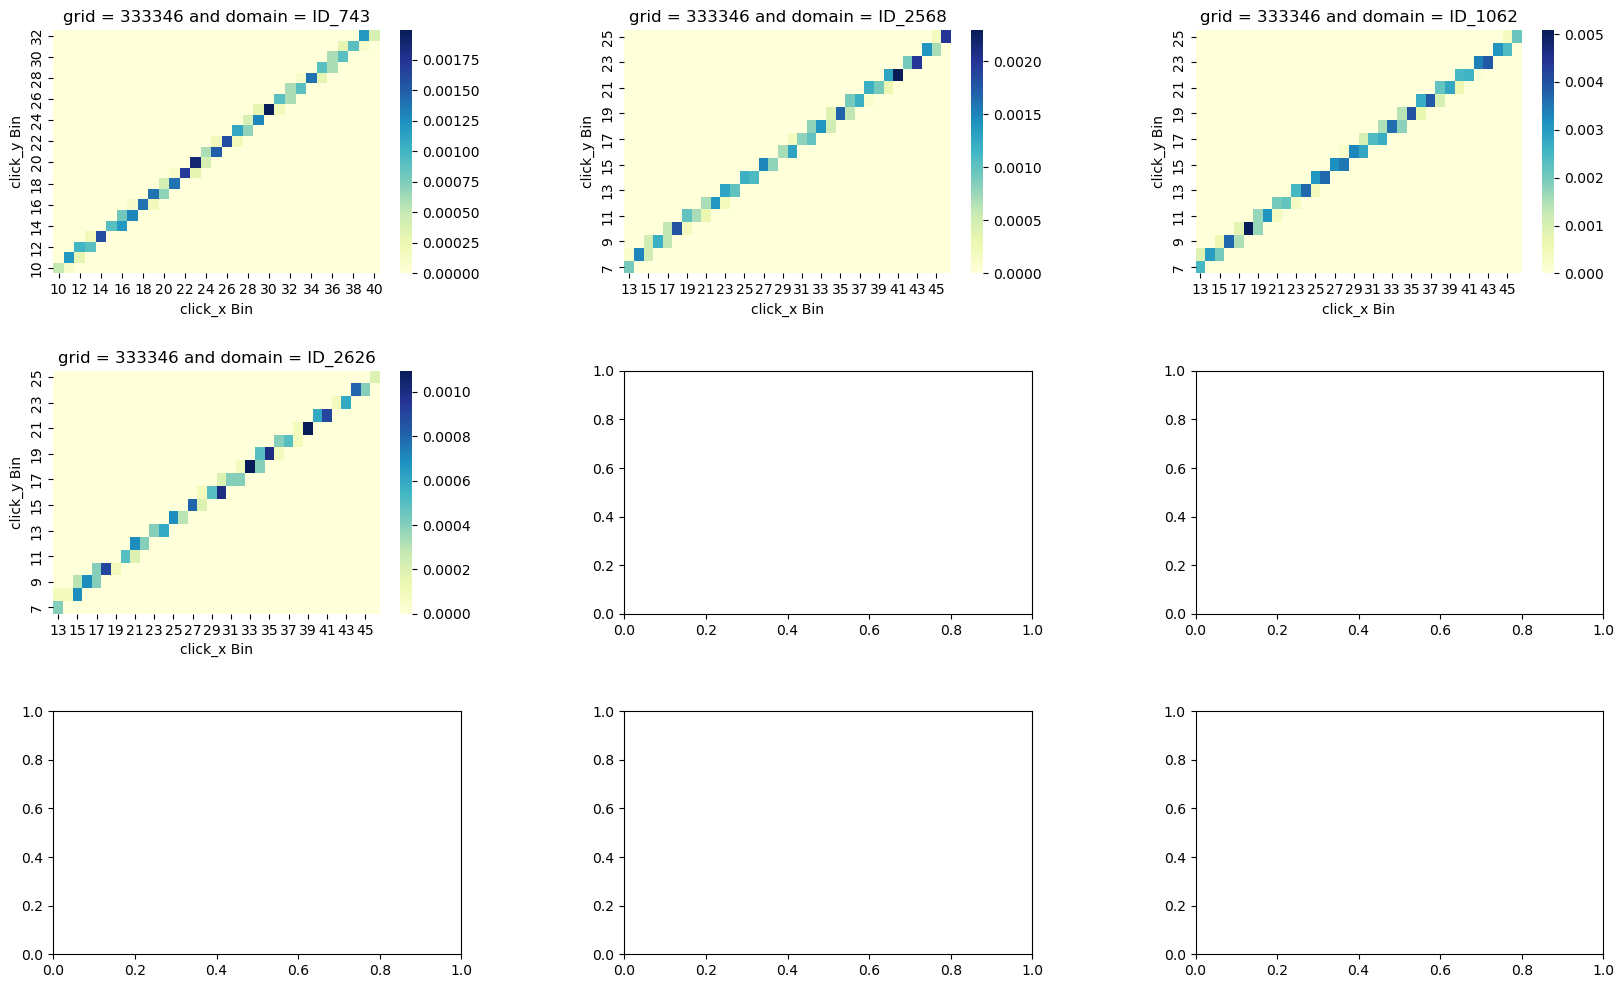

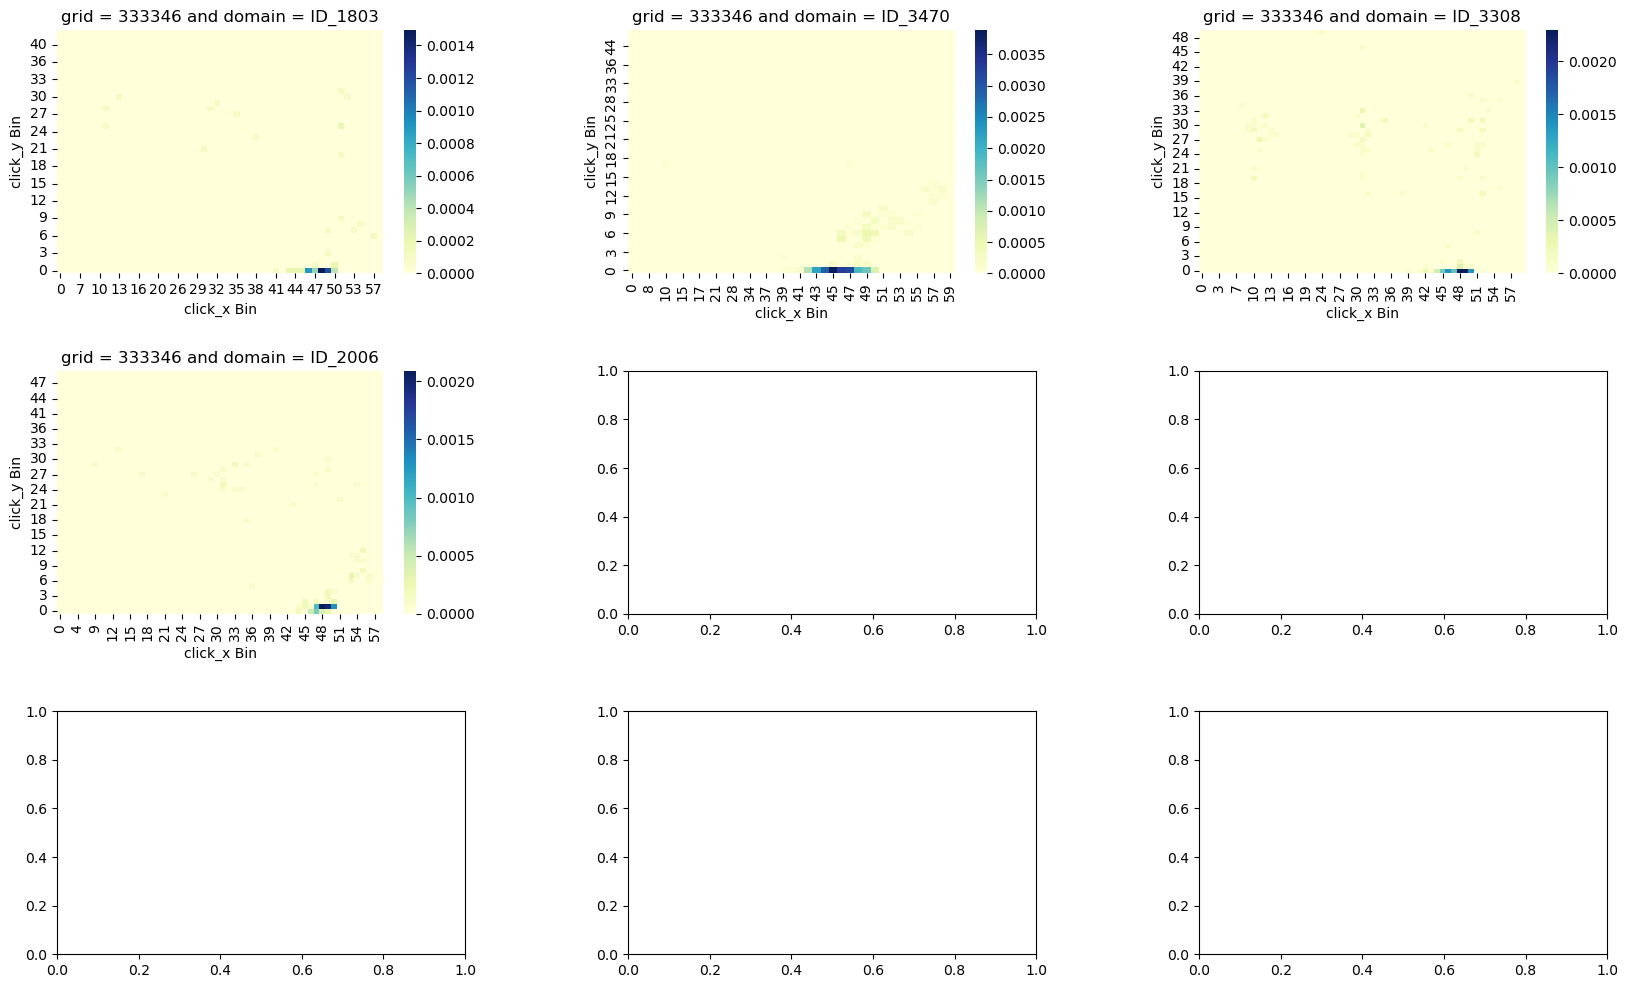

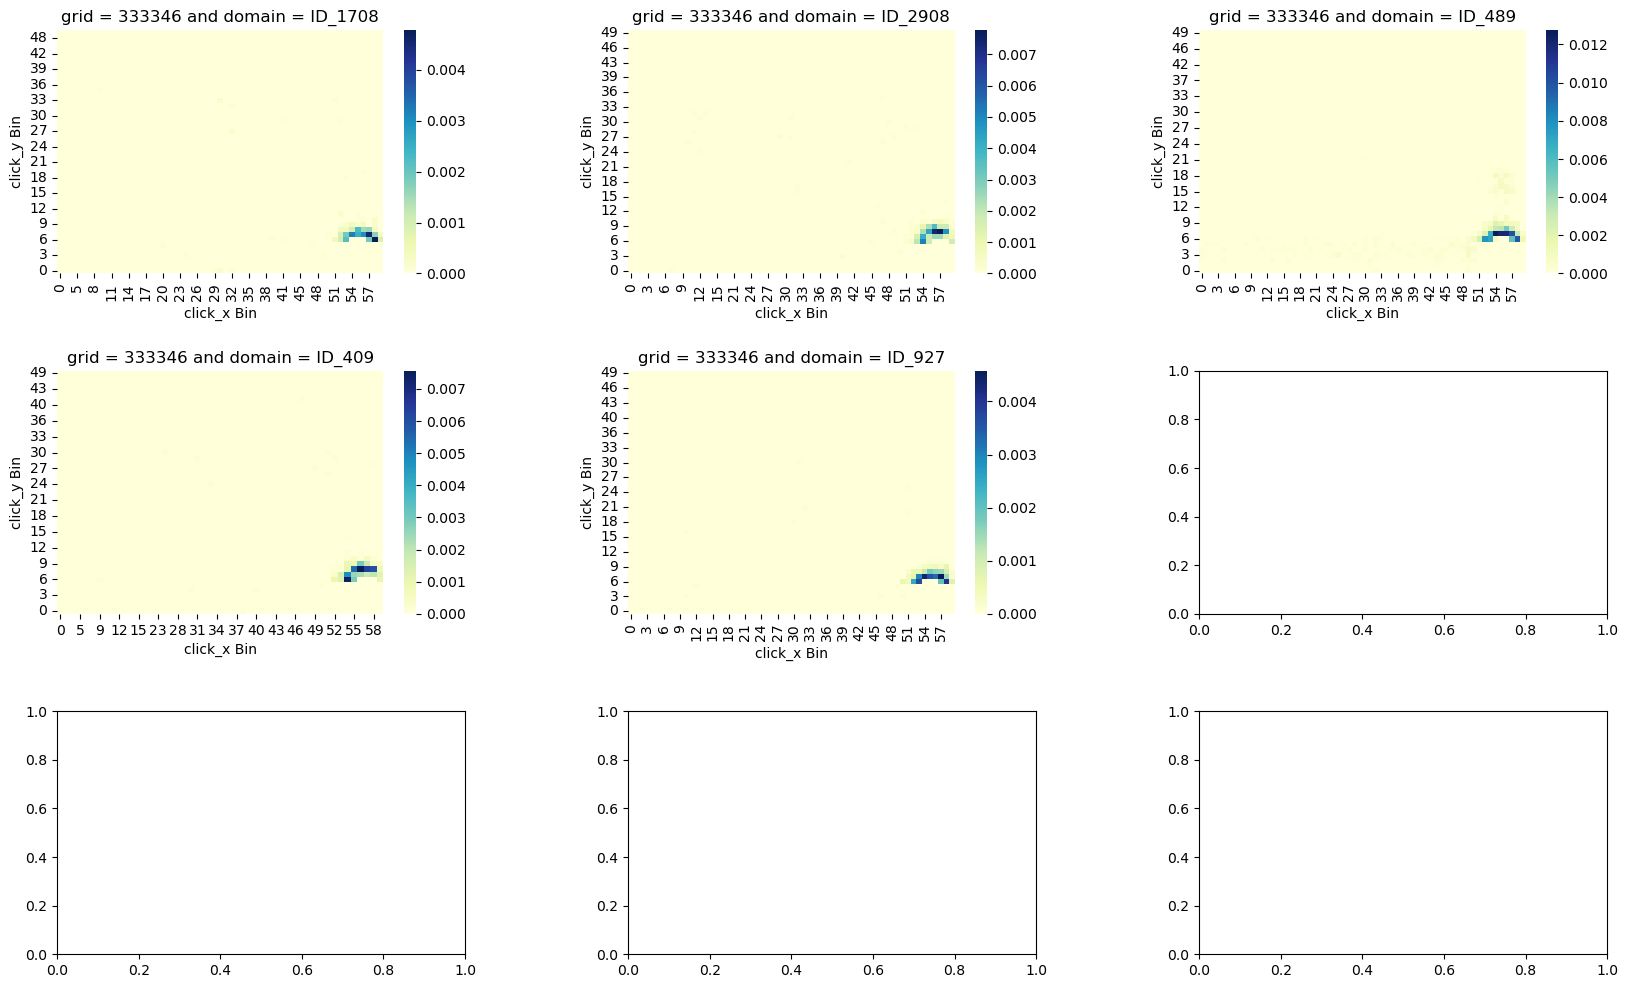

In [ ]:
for key, value in cluster_333346.items():
    plot_anomaly(3,3,[[333346, x] for x in value], df)

In [ ]:
def calculate_centroid(heatmap):
    total_intensity = heatmap.clicks_sum.sum()
    centroid_x = (heatmap.click_x_bin * heatmap.clicks_sum).sum() / total_intensity
    centroid_y = (heatmap.click_y_bin * heatmap.clicks_sum).sum() / total_intensity
    return [centroid_x, centroid_y]

calculate_centroid(aggregated_clicks[(aggregated_clicks.domain == 'ID_1281') & (aggregated_clicks.grid_id == 333519)])


[17.05531914893617, 10.05531914893617]

In [ ]:
# normalize clicks
df = aggregated_clicks
# df['clicks_sum'] =  (df['clicks_sum'] - df['clicks_sum'].min()) / (df['clicks_sum'].max() - df['clicks_sum'].min())

group_sum = df.groupby(['grid_id', 'domain'])['clicks_sum'].transform('sum')
# Normalize 'clicks_sum' by the group sum
df['clicks_sum'] = df['clicks_sum'] / group_sum

group_squares_sum = df.groupby(['grid_id', 'domain'])['clicks_sum'].transform(lambda x: math.sqrt((x**2).sum()))
# Divide by the sum of squares (norm) for each group
df['clicks_sum'] = df['clicks_sum'] / group_squares_sum

In [ ]:
data = [(333519, key, value) for key, value_list in cluster_333519.items() for value in value_list]
df_cluster = pd.DataFrame(data, columns=['grid_id', 'cluster', 'domain'])
data1 = [(333346, key, value) for key, value_list in cluster_333346.items() for value in value_list]
df_cluster1 = pd.DataFrame(data1, columns=['grid_id', 'cluster', 'domain'])
cluster_all = pd.concat([df_cluster, df_cluster1], axis = 0)

In [ ]:
centroids = {}
groups = cluster_all.groupby(['cluster'])
for cluster, group in groups:
    centroids[cluster] = calculate_centroid(pd.merge(df, group, on=['grid_id', 'domain'], how='inner'))

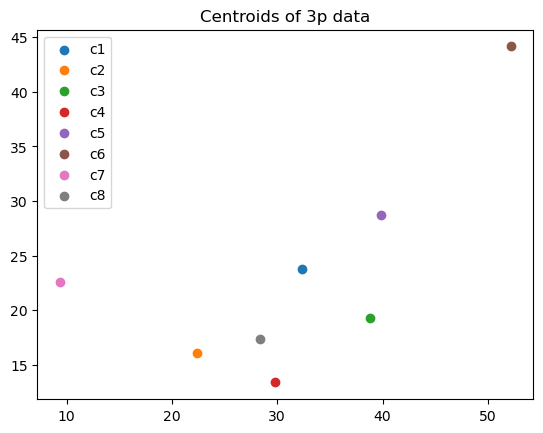

In [ ]:
for key, (x, y) in centroids.items():
    plt.scatter(x, y, label=key)

plt.legend()
plt.title('Centroids of 3p data')
plt.show()

In [ ]:
data_heatmap_t2m = pd.read_csv('../datasets/A_data_heatmap_300x250_6p_t2m.csv')
data_heatmap_h2m = pd.read_csv('../datasets/A_data_heatmap_300x250_6p_h2m.csv')

data_heatmap = pd.concat([data_heatmap_t2m, data_heatmap_h2m])
data_heatmap

Unnamed: 0   domain  grid_id  click_x  click_y  display_height  \
0           2000000  ID_2674   333346       62      137             250   
1           2000001  ID_2674   333346       66       93             250   
2           2000002  ID_2674   333346      249      154             250   
3           2000003  ID_2674   333346       86      156             250   
4           2000004  ID_2674   333346       71      131             250   
...             ...      ...      ...      ...      ...             ...   
1999995     1999995  ID_2674   333346       43      140             250   
1999996     1999996  ID_2674   333346      215      140             250   
1999997     1999997  ID_2674   333346      149      129             250   
1999998     1999998  ID_2674   333346      228      113             250   
1999999     1999999  ID_2674   333346      252       97             250   

         display_width  clicks  click_x_rel  click_y_rel  
0                  300       1          8.0         22.0  
1                  300       1          9.0         15.0  
2                  300       1         33.0         25.0  
3                  300       1         11.0         25.0  
4                  300       1          9.0         21.0  
...                ...     ...          ...          ...  
1999995            300       1          6.0         22.0  
1999996            300       1         29.0         22.0  
1999997            300       1         20.0         21.0  
1999998            300       1         30.0         18.0  
1999999            300       1         34.0         16.0  

[4075996 rows x 10 columns]

In [ ]:
# expand so that each row corresponds to 1 click:
data_heatmap_expanded = data_heatmap.loc[data_heatmap.index.repeat(data_heatmap['clicks'])].reset_index(drop=True)
data_heatmap_expanded['clicks'] = 1 

In [ ]:
# Binning clicks in nr_of_x_bins, nr_of_y_bins:

NR_OF_X_BINS = 61
NR_OF_Y_BINS = 51

max_width = data_heatmap['display_width'].max()
max_height = data_heatmap['display_height'].max()

width_bins = np.linspace(1, max_width, NR_OF_X_BINS)
height_bins = np.linspace(1, max_height, NR_OF_Y_BINS)

width_bins_max = len(width_bins)-2 # start at 0
height_bins_max = len(height_bins)-2

data_heatmap_expanded['click_x_bin'] = pd.cut(data_heatmap_expanded['click_x'], 
                                      bins   = width_bins, 
                                      labels = False, 
                                      include_lowest = True)

data_heatmap_expanded['click_y_bin'] = pd.cut(data_heatmap_expanded['click_y'], 
                                      bins = height_bins, 
                                      labels = False, 
                                      include_lowest = True)


df_new = data_heatmap_expanded.groupby(['grid_id',
                                           'domain', 
                                           'click_x_bin', 
                                           'click_y_bin']).size().reset_index(name='clicks_sum')


In [ ]:
# normalize clicks
# df_new['clicks_sum'] =  (df_new['clicks_sum'] - df_new['clicks_sum'].min()) / (df_new['clicks_sum'].max() - df_new['clicks_sum'].min())

group_sum = df_new.groupby(['grid_id', 'domain'])['clicks_sum'].transform('sum')
# Normalize 'clicks_sum' by the group sum
df_new['clicks_sum'] = df_new['clicks_sum'] / group_sum

group_squares_sum = df_new.groupby(['grid_id', 'domain'])['clicks_sum'].transform(lambda x: math.sqrt((x**2).sum()))
# Divide by the sum of squares (norm) for each group
df_new['clicks_sum'] = df_new['clicks_sum'] / group_squares_sum

In [ ]:
def cosine_similarity(vector_a, vector_b):
    dot_product = np.dot(vector_a, vector_b)
    norm_a = np.linalg.norm(vector_a)
    norm_b = np.linalg.norm(vector_b)
    similarity = dot_product / (norm_a * norm_b)
    return similarity

In [ ]:
import math

dis = []

groups = df_new.groupby(['grid_id', 'domain'])
for (grid_id, domain), group in groups:
    current_centroid = calculate_centroid(df_new[(df_new.grid_id == grid_id) & (df_new.domain == domain)])

    for cluster, previous_centroid in centroids.items():
        distance = math.sqrt(sum((a - b) ** 2 for a, b in zip(current_centroid, previous_centroid))) # Euclidean distance
        # distance = cosine_similarity(current_centroid, previous_centroid) # cosine similarity
        dis.append((grid_id, domain, cluster, distance))


In [ ]:
threshold = 2
anomaly = [row for row in dis if row[3] < threshold]
# threshold = 0.99999
# anomaly = [row for row in dis if row[3] > threshold]

In [ ]:
anomaly_ = {(row[0], row[1]) for row in anomaly}
len(anomaly_)

200

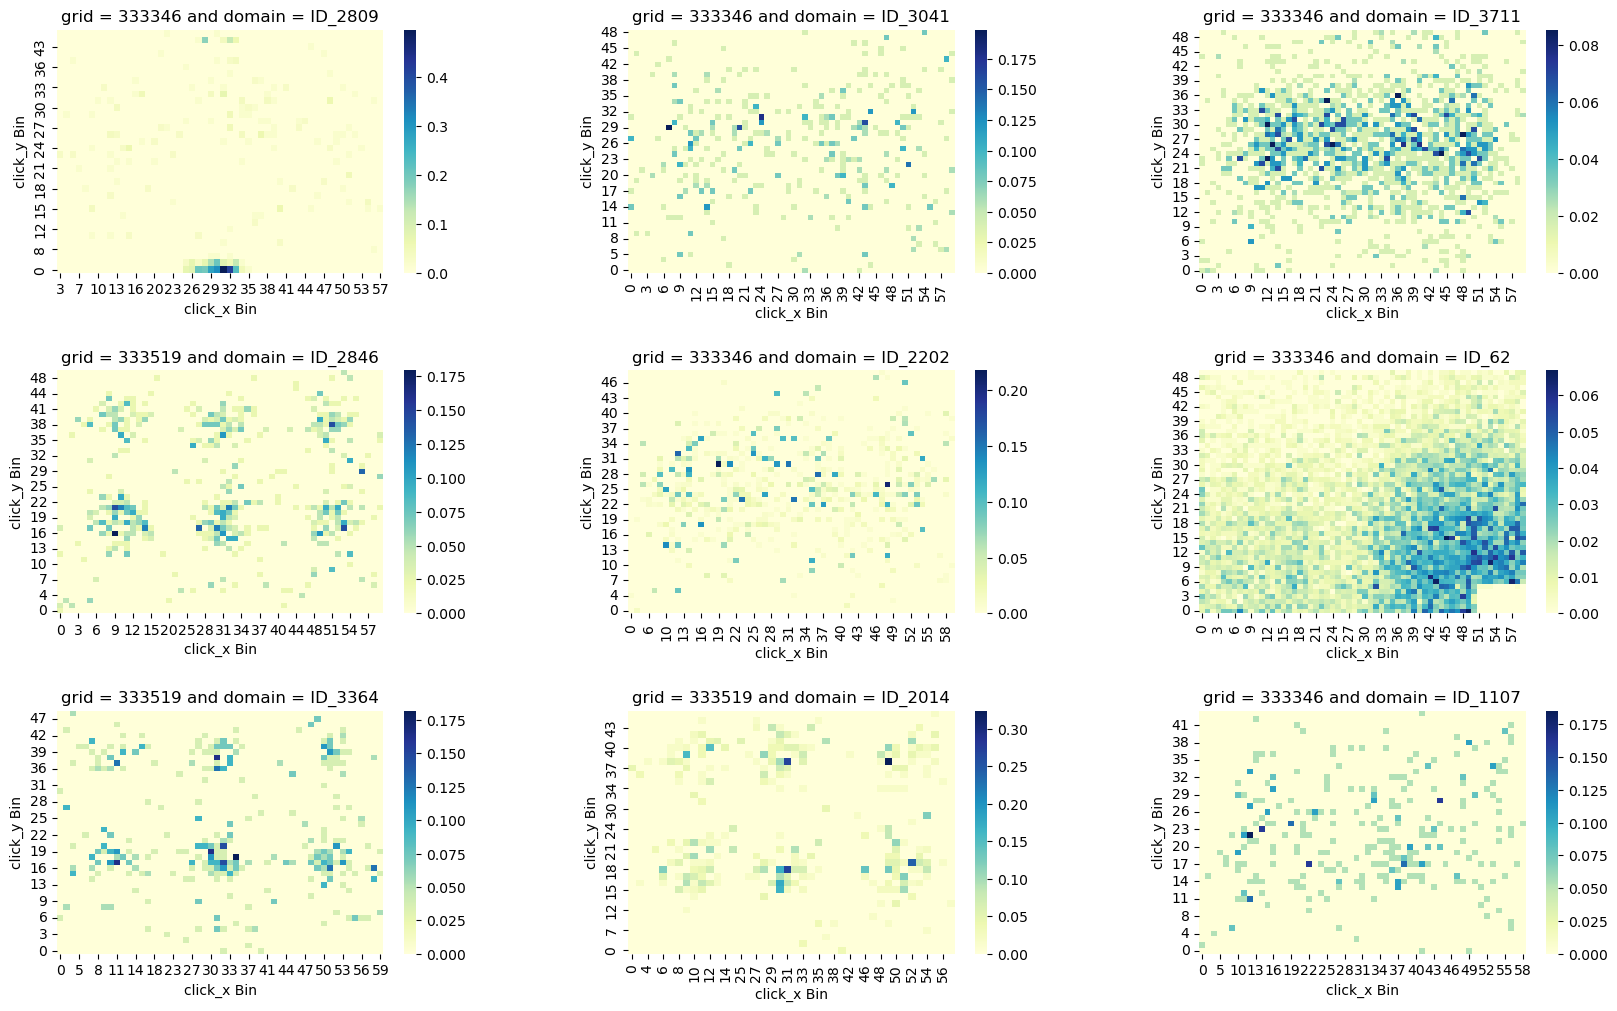

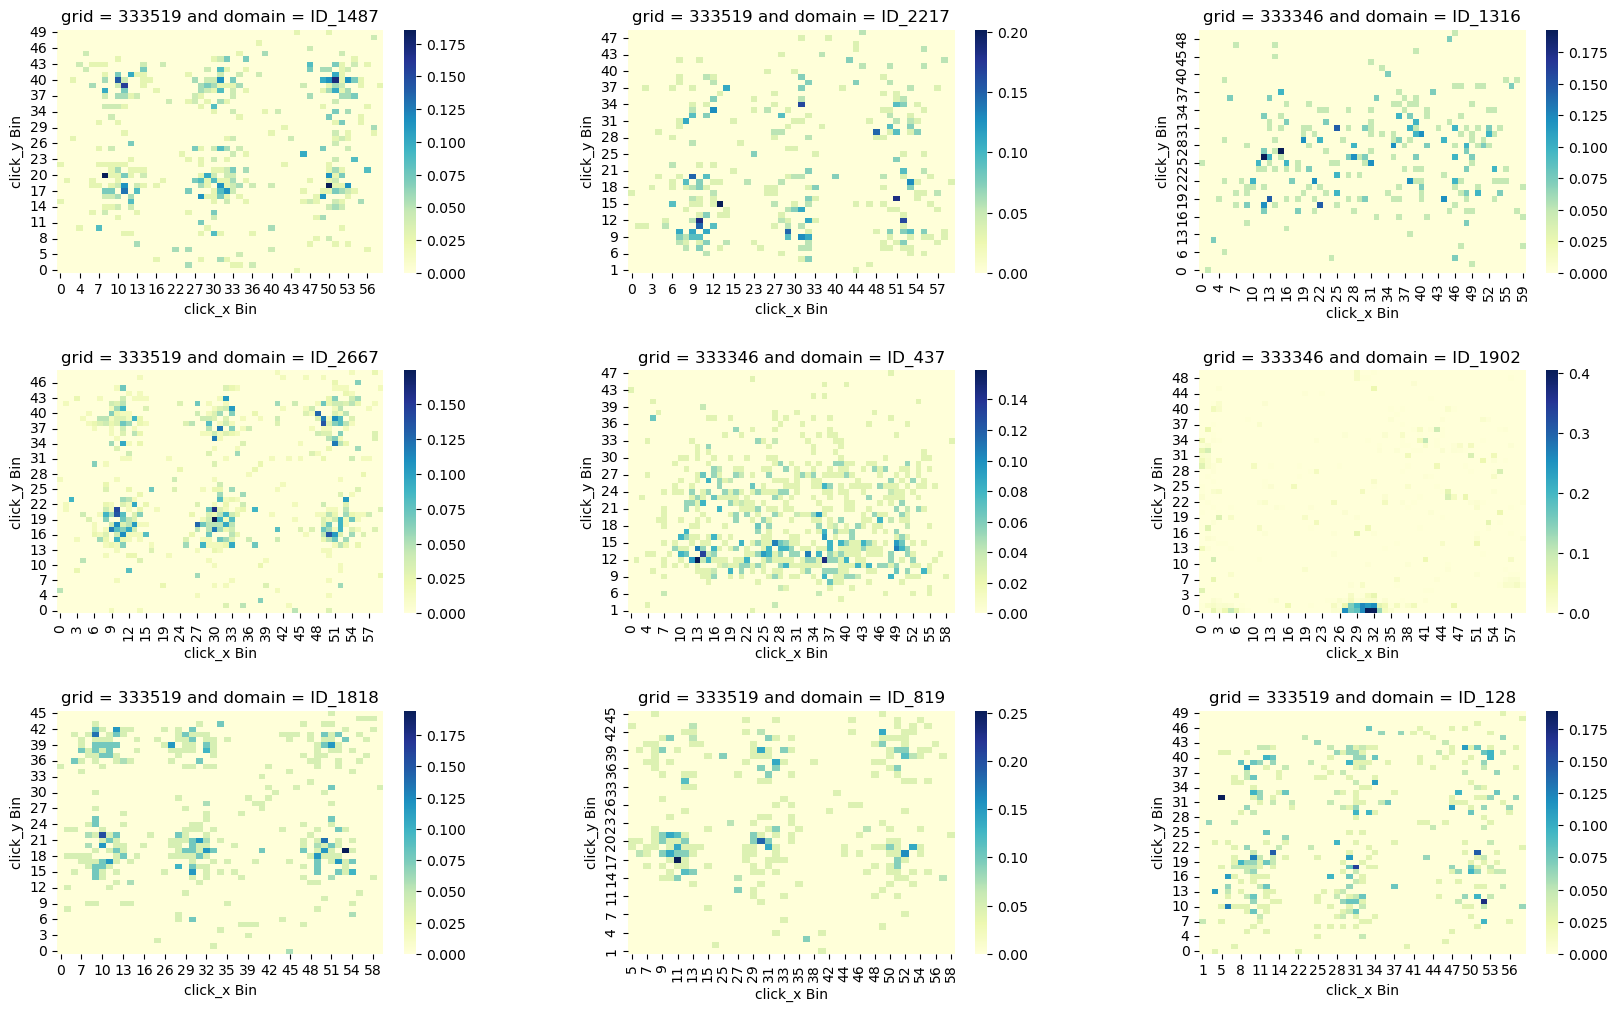

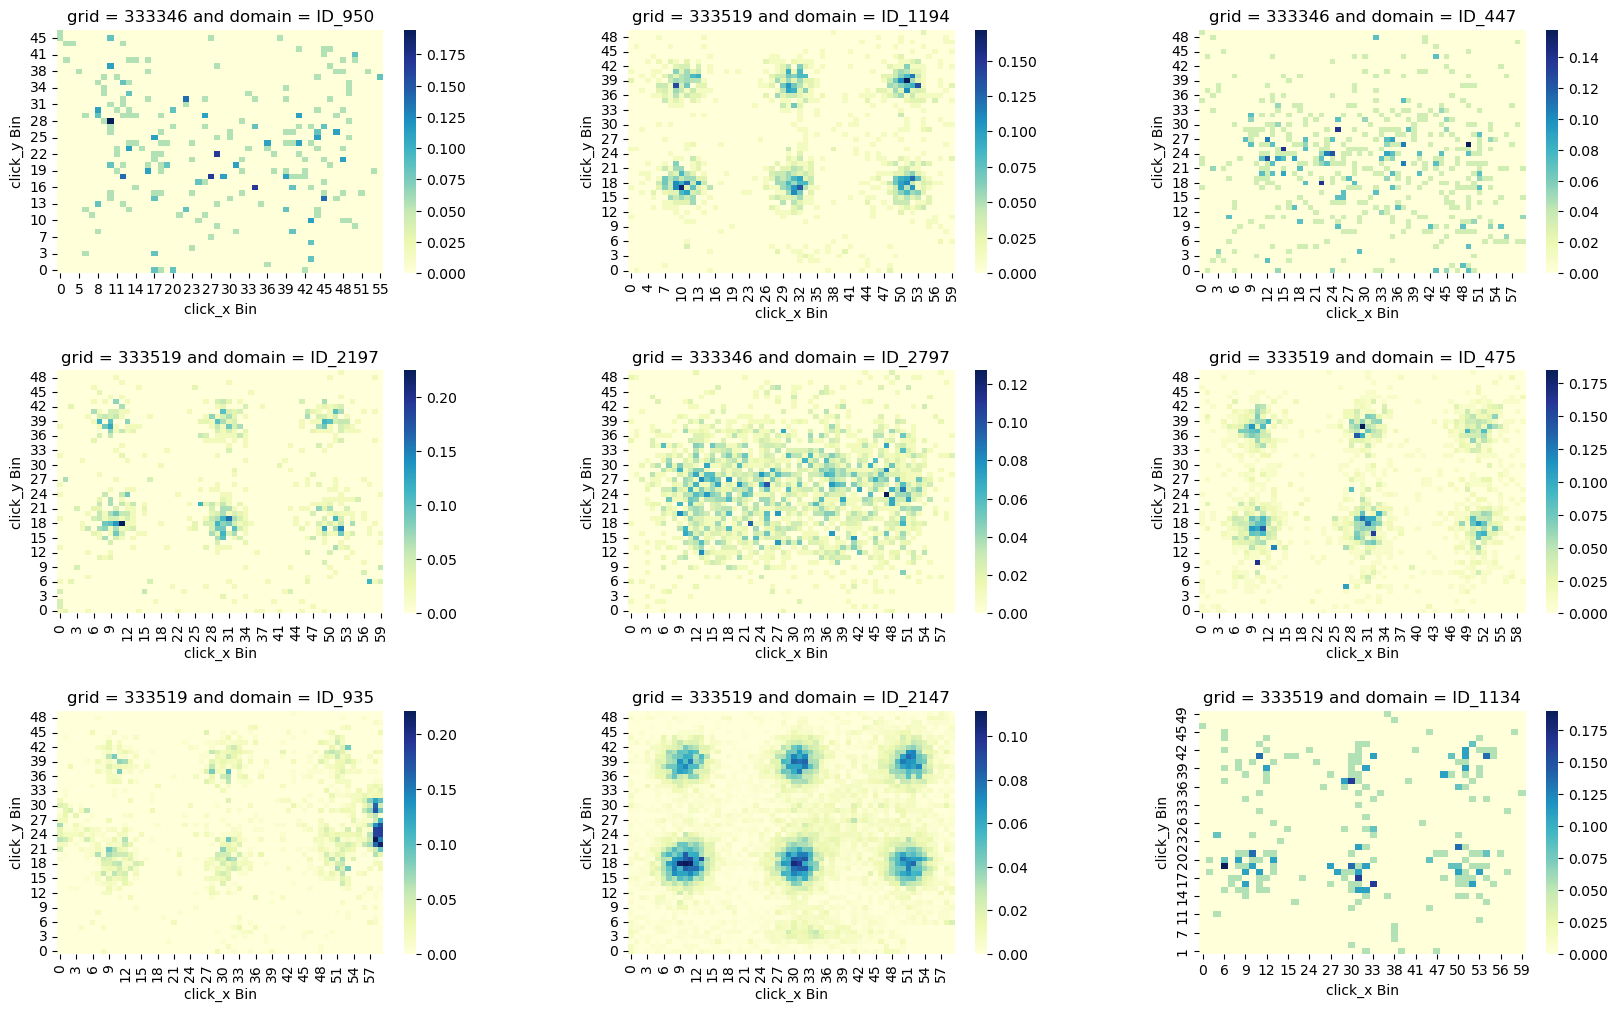

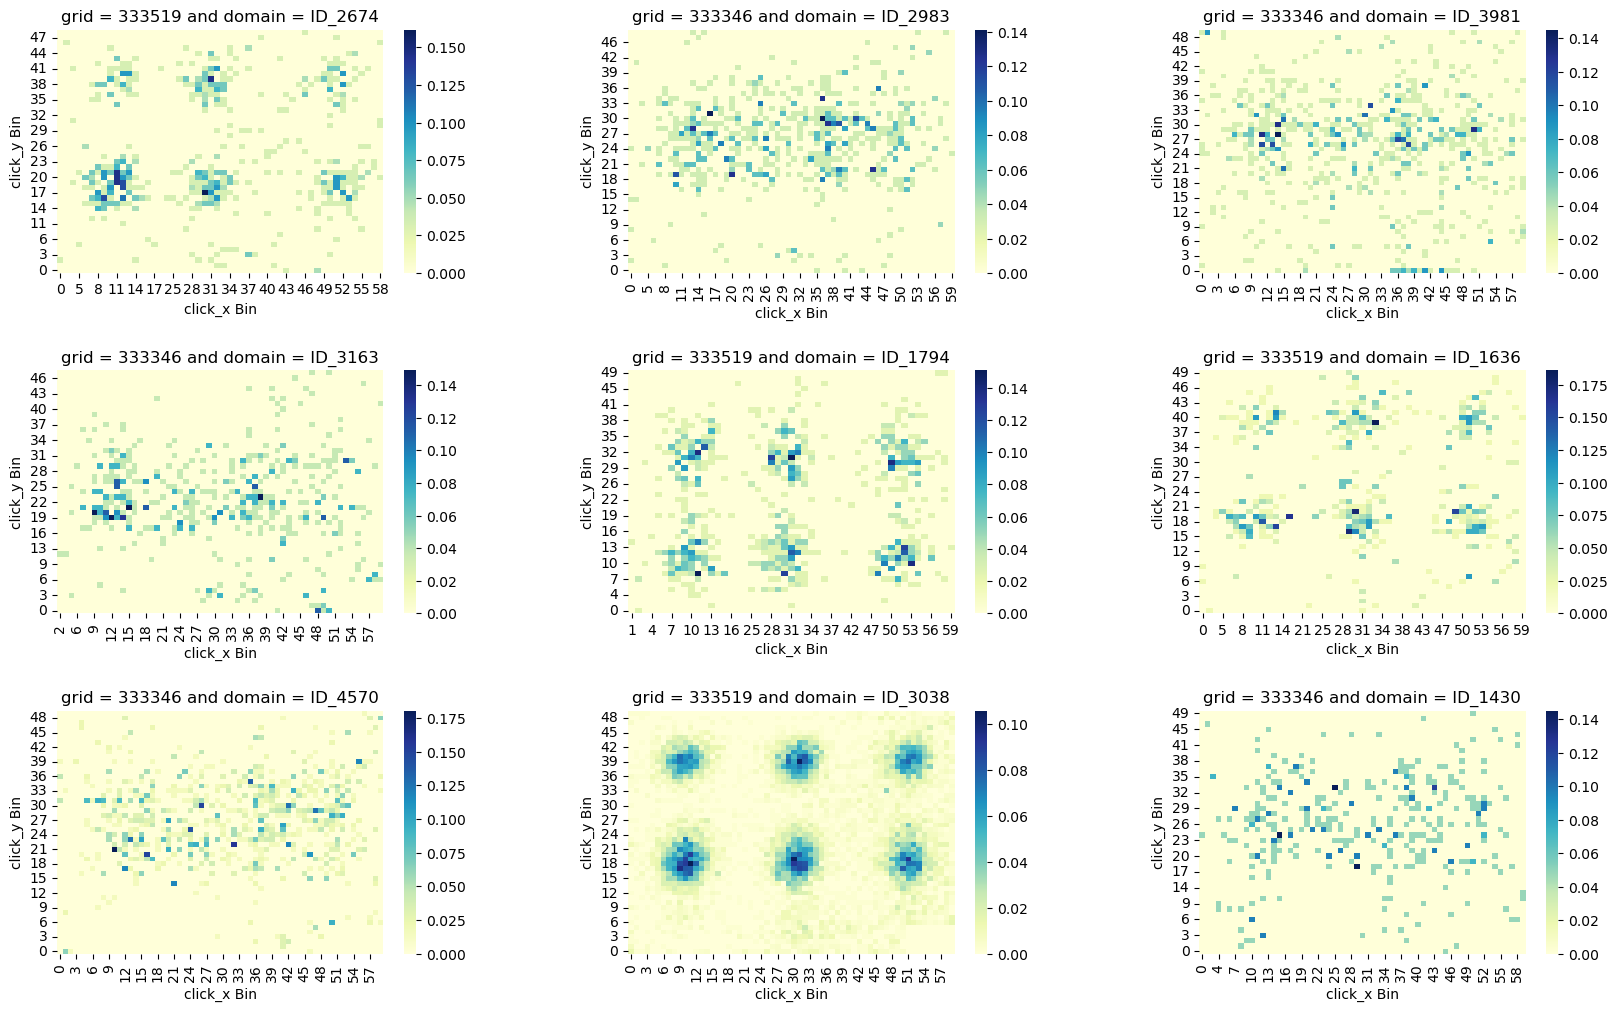

KeyboardInterrupt: 

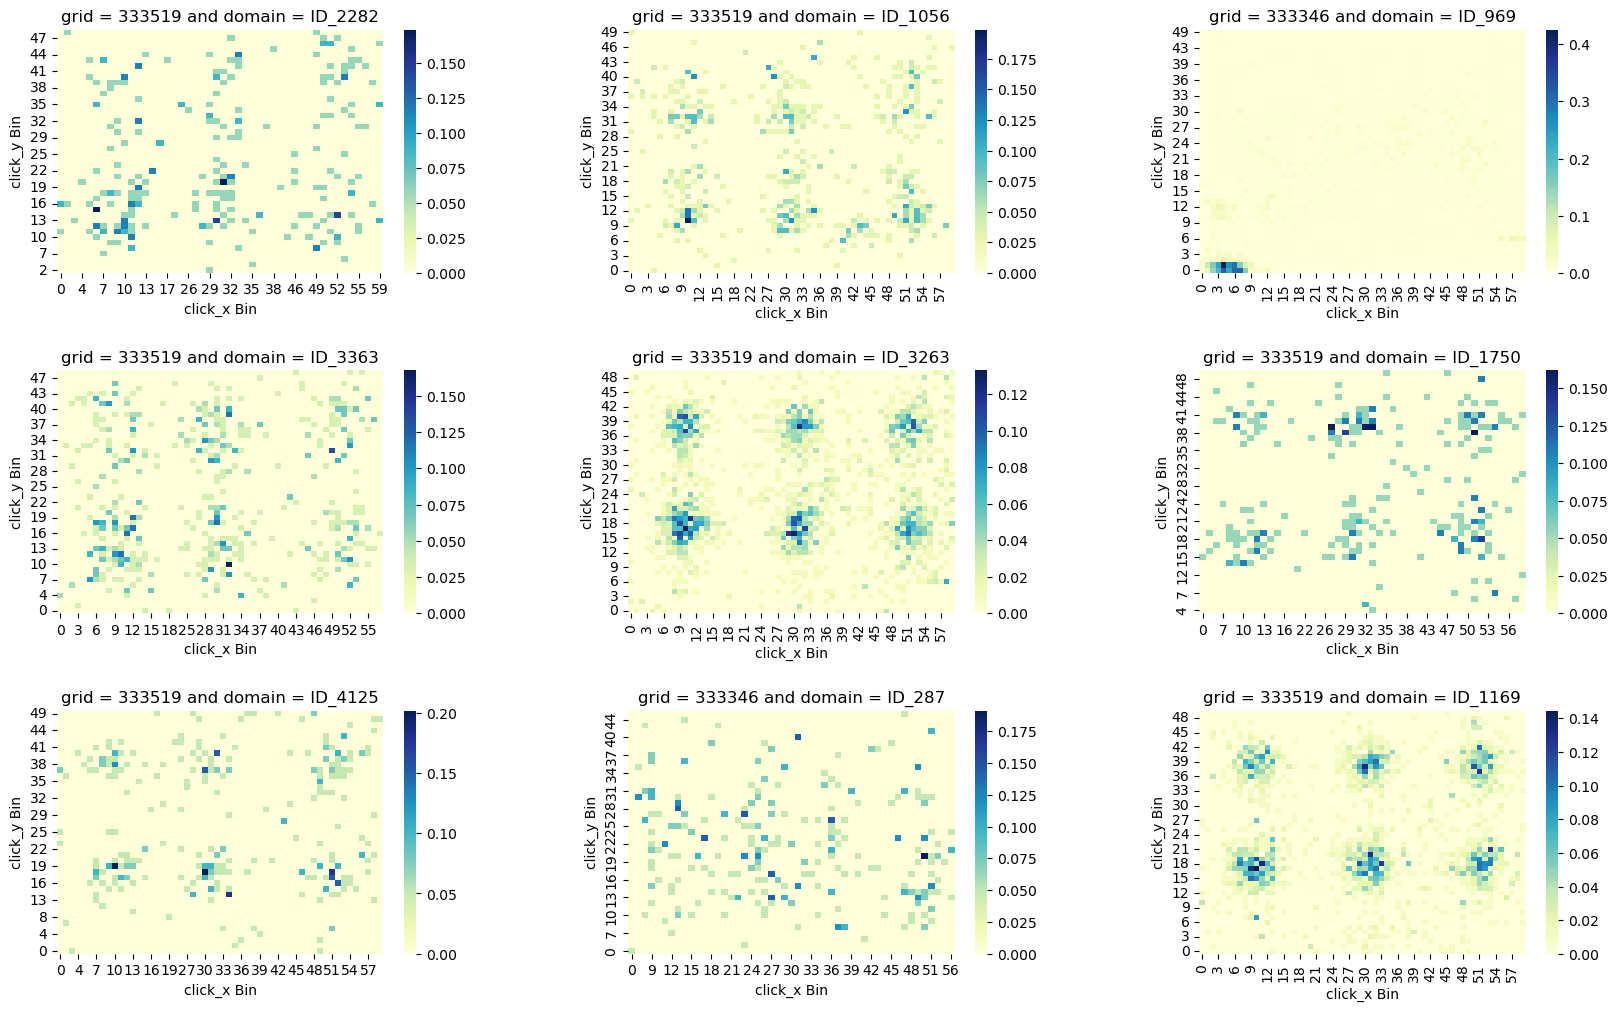

In [ ]:
plot_anomaly(3,3,anomaly_, df_new)

In [ ]:
cb_333346_6p = ['ID_106', 'ID_1003', 'ID_1081', 'ID_1108', 'ID_1111', 'ID_1150', 'ID_1217', 'ID_1303', 'ID_1347', 
                'ID_136', 'ID_1464', 'ID_1542', 'ID_1579', 'ID_1589', 'ID_1602', 'ID_1624','ID_1640', 'ID_1731',
                'ID_185', 'ID_1902', 'ID_1908', 'ID_1915', 'ID_1916', 'ID_1917','ID_1971', 'ID_1974', 'ID_2015', 
                'ID_2063', 'ID_2077', 'ID_2099', 'ID_2104', 'ID_2108', 'ID_2133', 'ID_2143', 'ID_2214', 'ID_2242',
                'ID_2279', 'ID_2336', 'ID_2337', 'ID_2368', 'ID_2400', 'ID_2404', 'ID_243', 'ID_2435', 'ID_245', 
                'ID_2553', 'ID_2564', 'ID_2598', 'ID_2626', 'ID_2627', 'ID_2635', 'ID_2636', 'ID_2648', 'ID_267', 
                'ID_2693', 'ID_27', 'ID_2737', 'ID_2750', 'ID_2760', 'ID_2762', 'ID_2766', 'ID_2779', 'ID_2809', 
                'ID_2867', 'ID_2881', 'ID_2924', 'ID_2933', 'ID_2977', 'ID_3019', 'ID_3098', 'ID_313', 'ID_3157', 
                'ID_3172', 'ID_3178', 'ID_3219', 'ID_3231', 'ID_324', 'ID_3268', 'ID_3308', 'ID_333', 'ID_3334', 
                'ID_3375', 'ID_3389', 'ID_3405', 'ID_3418', 'ID_3472', 'ID_3487', 'ID_3526', 'ID_3535', 'ID_3567',
                'ID_3605', 'ID_3614', 'ID_362', 'ID_3633', 'ID_3640', 'ID_3644', 'ID_365', 'ID_367', 'ID_3672', 
                'ID_3699', 'ID_3726', 'ID_3730', 'ID_3781', 'ID_3799', 'ID_3800', 'ID_3809', 'ID_3837', 'ID_3848', 
                'ID_3850', 'ID_389', 'ID_3917', 'ID_3920', 'ID_3939', 'ID_3982', 'ID_401', 'ID_4016', 'ID_4040',
                'ID_4042', 'ID_4058', 'ID_4072', 'ID_4076', 'ID_4199', 'ID_4204', 'ID_4206', 'ID_4224', 'ID_4275',
                'ID_429', 'ID_4347', 'ID_4378', 'ID_4507', 'ID_4567','ID_466', 'ID_494', 'ID_514', 'ID_539', 
                'ID_582', 'ID_62', 'ID_71', 'ID_727', 'ID_731', 'ID_737', 'ID_825', 'ID_861', 'ID_869', 'ID_876', 
                'ID_889', 'ID_90', 'ID_922', 'ID_949', 'ID_969', 'ID_979', 'ID_981', 'ID_993']
cb_333519_6p = ['ID_1081', 'ID_1150', 'ID_1464', 'ID_1518', 'ID_1622', 'ID_1623', 'ID_1624', 'ID_1631', 'ID_1678', 
                'ID_1623', 'ID_1731', 'ID_1752', 'ID_1764', 'ID_1795', 'ID_1915', 'ID_1916', 'ID_1971', 'ID_198', 
                'ID_2018', 'ID_204', 'ID_2044', 'ID_2104', 'ID_2108', 'ID_2109', 'ID_2146', 'ID_2251', 'ID_2330', 
                'ID_2336', 'ID_2381', 'ID_2383', 'ID_2400', 'ID_2616', 'ID_2636', 'ID_2749', 'ID_2766', 'ID_2779', 
                'ID_2809', 'ID_284', 'ID_2875', 'ID_2881', 'ID_30', 'ID_3021', 'ID_3049', 'ID_3098', 'ID_3178', 
                'ID_3183', 'ID_3219', 'ID_3232', 'ID_3561', 'ID_3644', 'ID_365', 'ID_3850', 'ID_389', 'ID_4025', 
                'ID_4036', 'ID_4050', 'ID_4058', 'ID_4075', 'ID_4113', 'ID_4122', 'ID_4255', 'ID_4257', 'ID_4275', 
                'ID_4347', 'ID_44', 'ID_4506', 'ID_4567', 'ID_618', 'ID_727', 'ID_737', 'ID_922', 'ID_950', 'ID_960', 
                'ID_969']

In [ ]:
anomaly = pd.DataFrame(anomaly, columns=['grid_id', 'domain', 'cluster', 'similarity'])
anomaly = anomaly.loc[anomaly.groupby(['grid_id', 'domain'])['similarity'].idxmax()]
anomaly['clearly_broken'] = 0
anomaly.loc[(anomaly.grid_id  == 333519) & (anomaly.domain.isin(cb_333519_6p)), 'clearly_broken'] = 1
anomaly.loc[(anomaly.grid_id  == 333346) & (anomaly.domain.isin(cb_333346_6p)), 'clearly_broken'] = 1

In [ ]:
anomaly

NameError: name 'anomaly' is not defined

In [ ]:
len(anomaly[anomaly.clearly_broken==1])

31

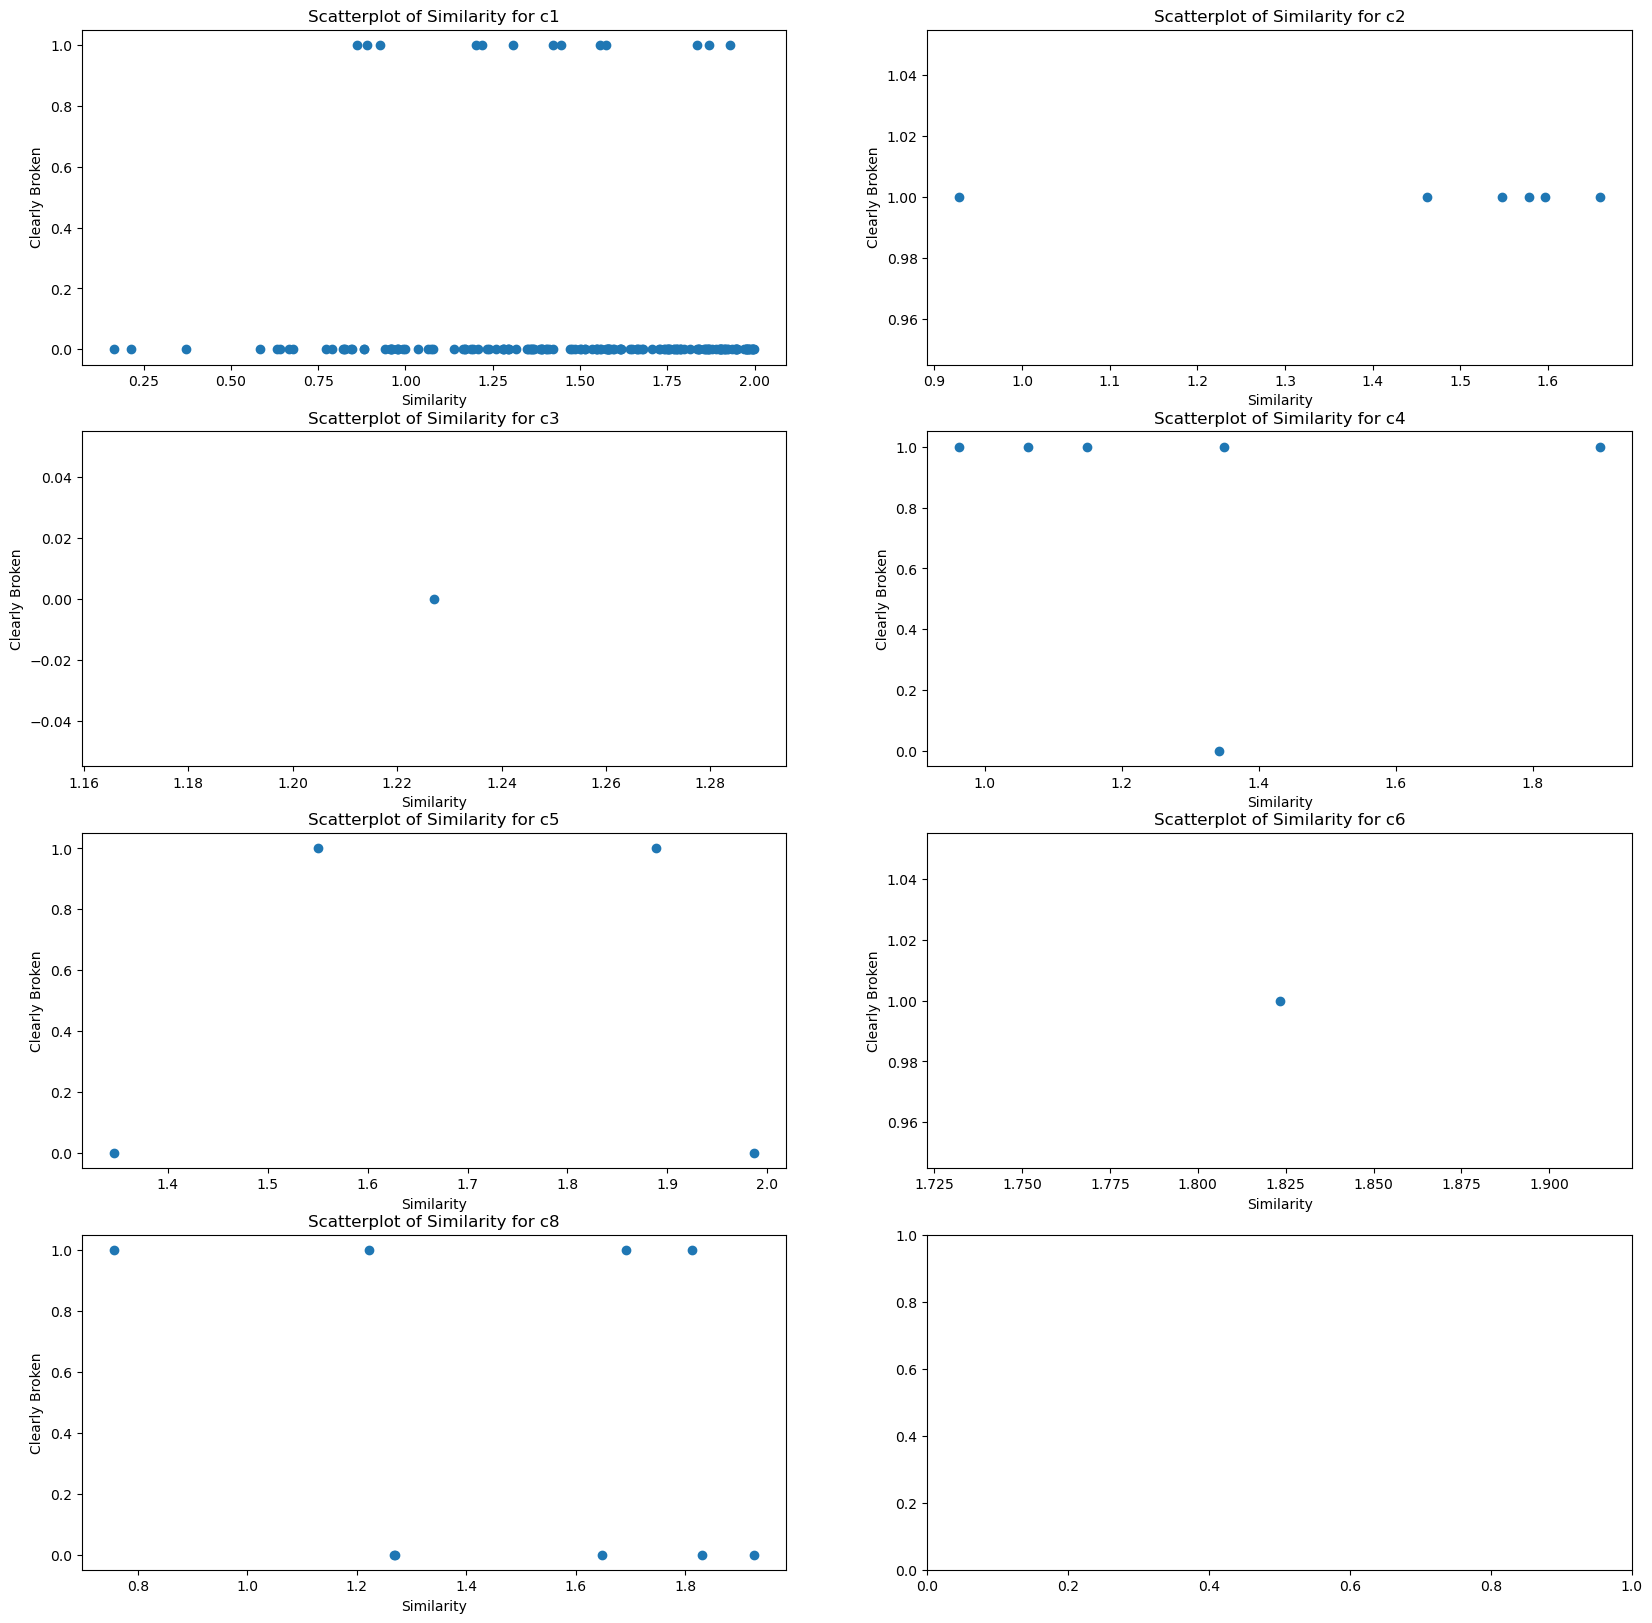

In [ ]:
fig, axes = plt.subplots(4, 2, figsize=(20, 20))
for ax, (group_name, group_data) in zip(axes.flatten(), anomaly.groupby('cluster')):
    ax.scatter(group_data['similarity'], group_data['clearly_broken'])
    ax.set_ylabel('Clearly Broken')
    ax.set_xlabel('Similarity')
    ax.set_title(f'Scatterplot of Similarity for {group_name}')
plt.show()


# Modified

In [ ]:
# maps for each broken clusters by mean
cluster_map = {}
groups = cluster_all.groupby(['cluster'])
for cluster, group in groups:
    cluster_data = pd.merge(df, group, on=['grid_id', 'domain'], how='inner')
    cluster_data = cluster_data.groupby(['click_x_bin', 'click_y_bin'], as_index=False)['clicks_sum'].mean()
    current_map = np.zeros((50, 60))
    for _, row in cluster_data.iterrows():
        current_map[int(row['click_y_bin']), int(row['click_x_bin'])] = row['clicks_sum']
    cluster_map[cluster] = current_map

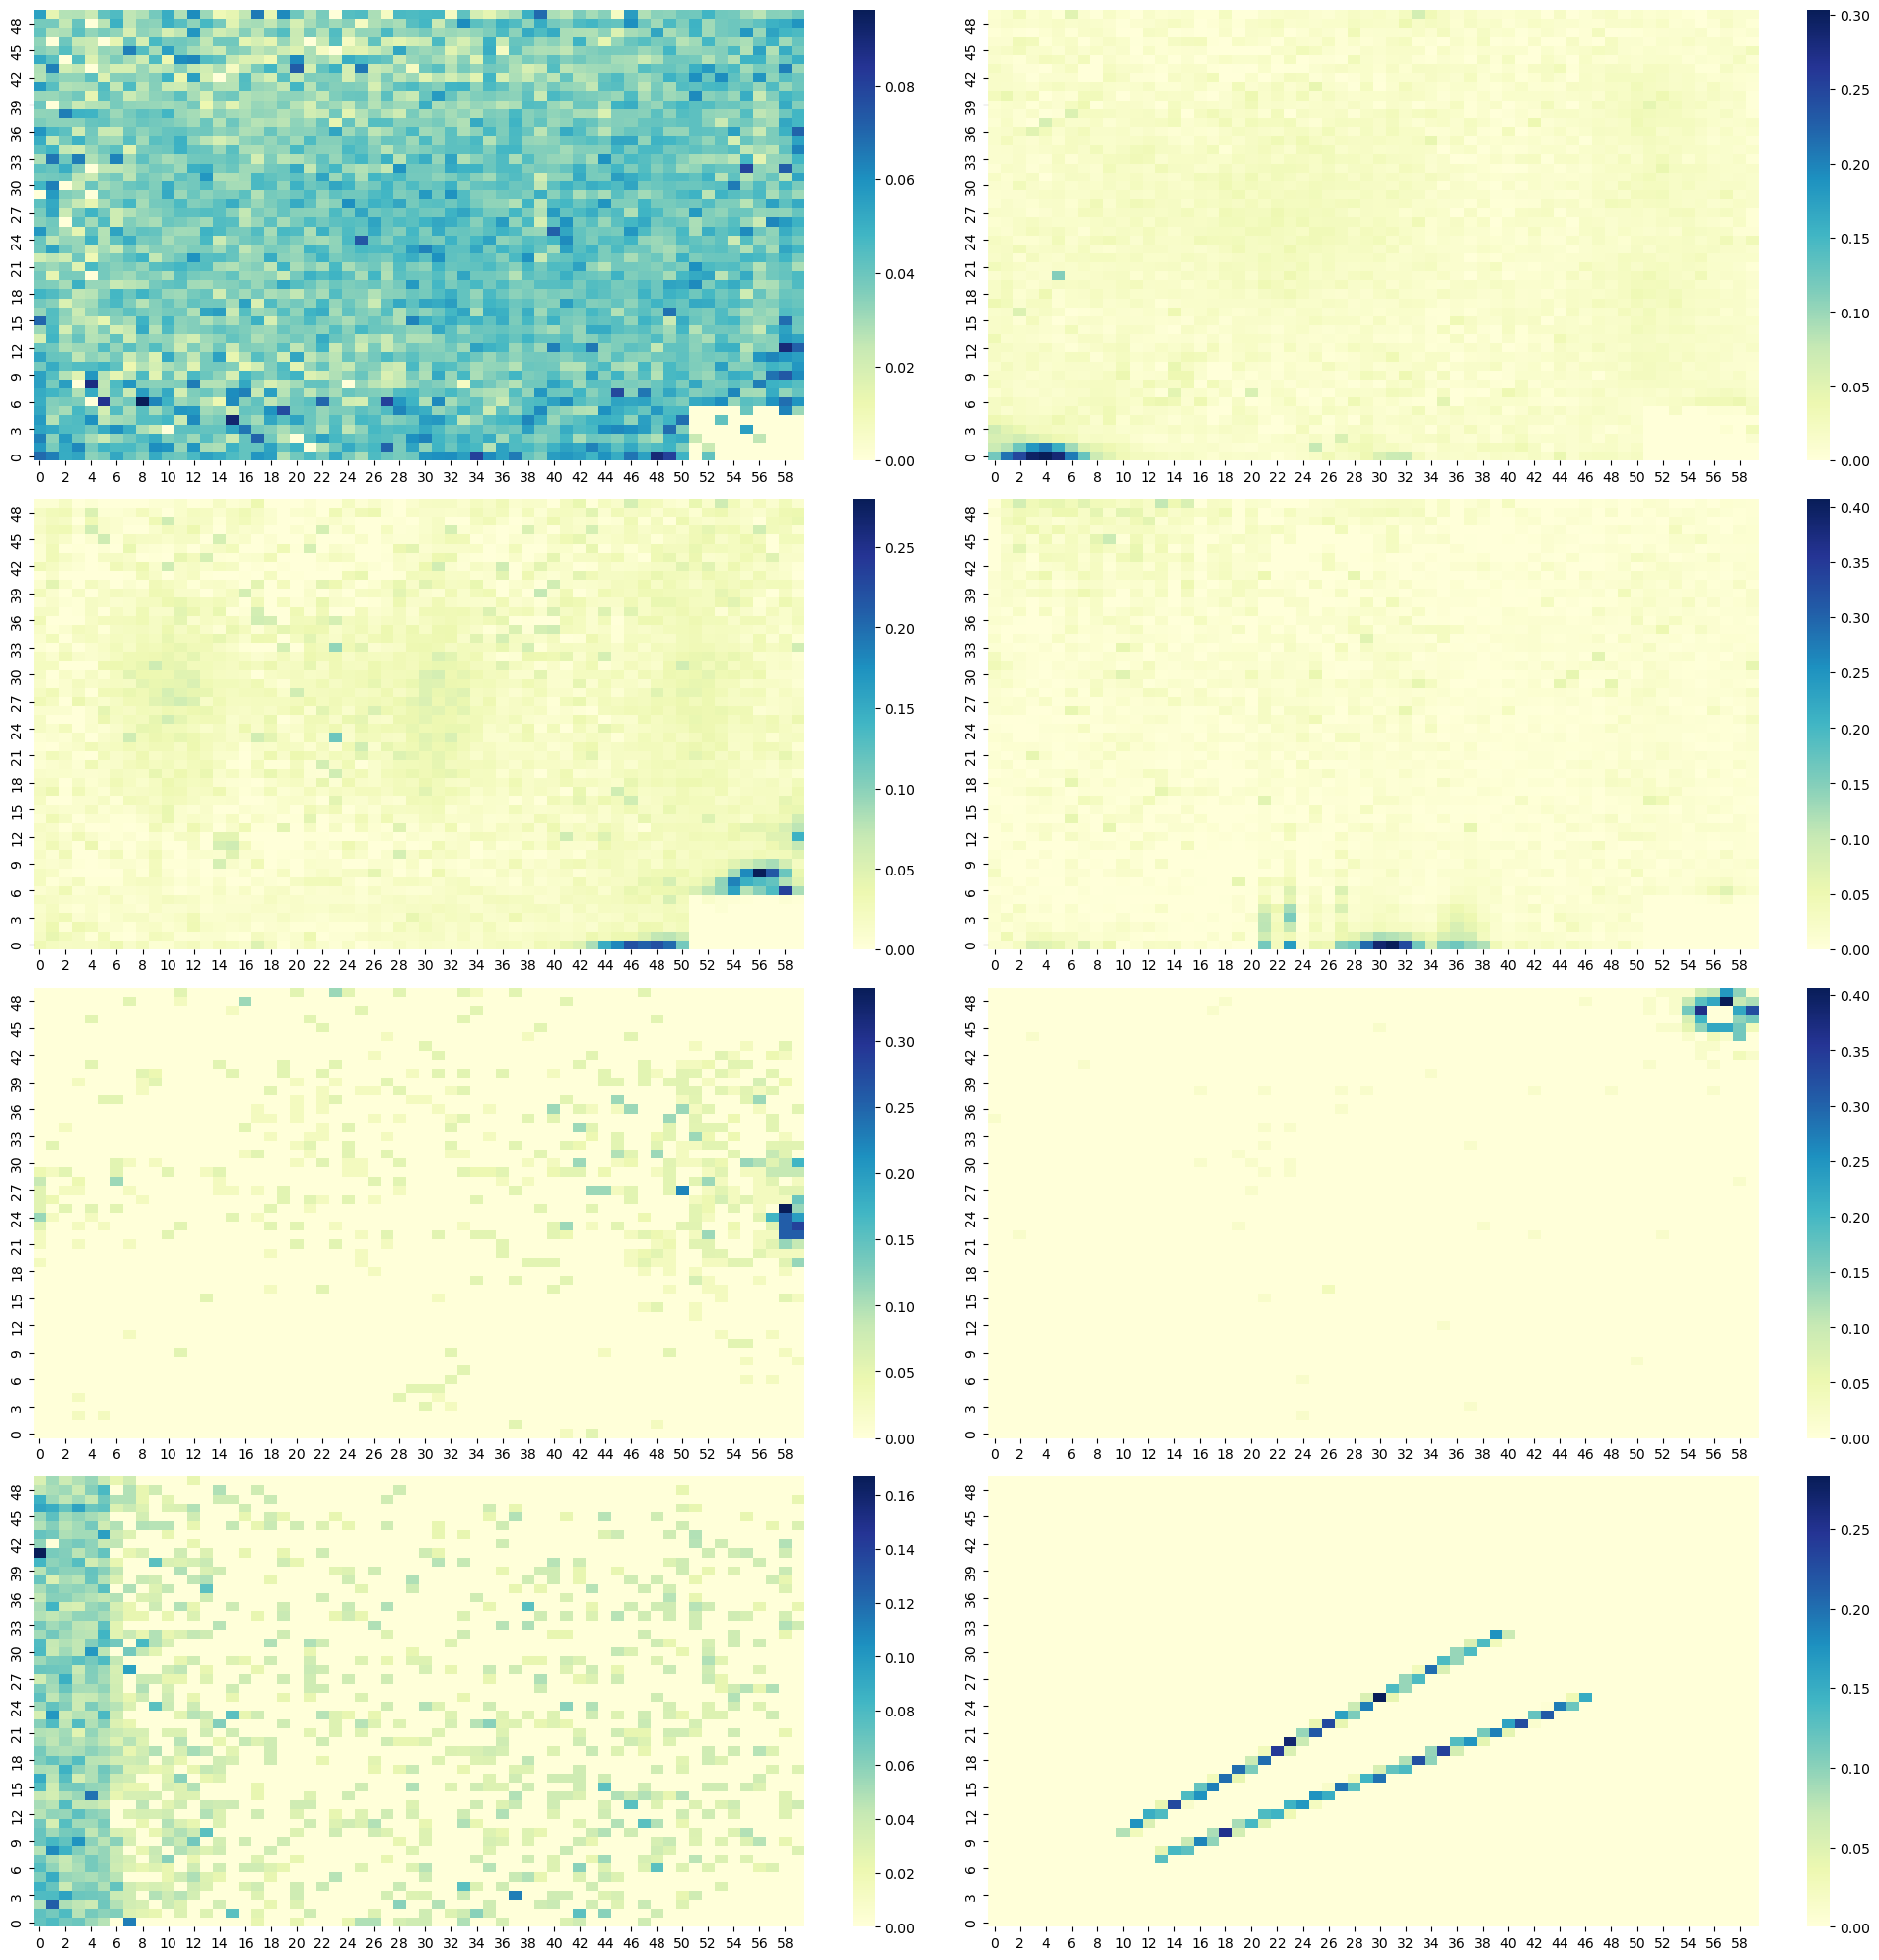

In [ ]:
# plot cluster_map
fig, axes = plt.subplots(4, 2, figsize=(20, 20))
for i, k in enumerate(cluster_map.keys()):
    # click_matrix = cluster_map[k].pivot("click_y_bin", "click_x_bin", "clicks_sum").fillna(0)
    # cluster_map[k] = click_matrix
    ax = axes[i // 2, i % 2]
    sns.heatmap(cluster_map[k], cmap="YlGnBu", annot=False, cbar=True, fmt="g", ax=ax)
    ax.invert_yaxis()
plt.tight_layout()
plt.show()

In [ ]:
# similarity between each heatmap in 3p data and cluster_map
sim_old = []
groups = df.groupby(['grid_id', 'domain'])
for (grid_id, domain), group in groups:
    current_df = df[(df.grid_id==grid_id) & (df.domain == domain)]
    current_map = np.zeros((50, 60))
    for _, row in current_df.iterrows():
        current_map[row['click_y_bin'], row['click_x_bin']] = row['clicks_sum']

    for cluster, previous_map in cluster_map.items():
        similarity = cosine_similarity(current_map.flatten(), previous_map.flatten()) # cosine similarity
        sim_old.append((grid_id, domain, cluster, similarity))

In [ ]:
anomaly = pd.DataFrame(sim_old, columns=['grid_id', 'domain', 'cluster', 'similarity'])

In [ ]:
anomaly = anomaly.loc[anomaly.groupby(['grid_id', 'domain'])['similarity'].idxmax()]
anomaly['clearly_broken'] = 0
anomaly.loc[(anomaly.grid_id  == 333519) & (anomaly.domain.isin(cb_333519)), 'clearly_broken'] = 1
anomaly.loc[(anomaly.grid_id  == 333346) & (anomaly.domain.isin(cb_333346)), 'clearly_broken'] = 1

In [147]:
# get the best thresholds for each cluster according to f1 score on 3p data
from sklearn.metrics import f1_score

best_thresholds = {}
for cluster in cluster_map.keys():
    max_f1 = 0
    for threshold in np.arange(0.0, 0.9, 0.05):
        cluster_data = anomaly[(anomaly.cluster == cluster)&(anomaly.similarity>threshold)]
        predictions = np.ones(len(cluster_data), dtype=int)
        f1 = f1_score(cluster_data['clearly_broken'], predictions)
        if f1 > max_f1:
            best_thresholds[cluster] = round(threshold,2)
            if f1 == 1.0:
                break
            max_f1 = f1

/Users/yinyue/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/yinyue/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/yinyue/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/

In [148]:
best_thresholds

{'c1': 0.55,
 'c2': 0.7,
 'c3': 0.6,
 'c4': 0.0,
 'c5': 0.0,
 'c6': 0.0,
 'c7': 0.0,
 'c8': 0.0}

In [162]:
best_thresholds['c2']=0.6 # manually modify threshold

In [161]:
anomaly[(anomaly.cluster == 'c2')&(anomaly.similarity>0.6)]

grid_id   domain cluster  similarity  clearly_broken
9       333346    ID_10      c2    0.640386               1
49      333346  ID_1030      c2    0.613898               1
521     333346  ID_1238      c2    0.609392               1
537     333346  ID_1240      c2    0.631141               1
601     333346  ID_1281      c2    0.625385               1
929     333346  ID_1437      c2    0.610424               1
1017    333346  ID_1483      c2    0.639603               1
3737    333346  ID_2742      c2    0.623195               1
5217    333346  ID_3382      c2    0.689436               1
5673    333346   ID_398      c2    0.656840               1
5889    333346   ID_526      c2    0.625551               1
5977    333346   ID_561      c2    0.635822               1
6025    333346   ID_580      c2    0.656054               1
6897    333519    ID_10      c2    0.637582               1
7425    333519  ID_1281      c2    0.611588               1
11433   333519  ID_3148      c2    0.682252               0
11937   333519  ID_3382      c2    0.719895               1
12401   333519   ID_398      c2    0.647222               1
12857   333519   ID_580      c2    0.668513               1
13369   333519   ID_793      c2    0.606245               1
13425   333519   ID_810      c2    0.622901               1
13817   333519   ID_986      c2    0.605080               1

In [194]:
# get the best thresholds for each cluster according to f1 score(for each cluster) on 6p data
from sklearn.metrics import f1_score

anomaly = pd.DataFrame(sim, columns=['grid_id', 'domain', 'cluster', 'similarity'])
anomaly = anomaly.loc[anomaly.groupby(['grid_id', 'domain'])['similarity'].idxmax()]
anomaly['clearly_broken'] = 0
anomaly['pred'] = 0
anomaly.loc[(anomaly.grid_id  == 333519) & (anomaly.domain.isin(cb_333519_6p)), 'clearly_broken'] = 1
anomaly.loc[(anomaly.grid_id  == 333346) & (anomaly.domain.isin(cb_333346_6p)), 'clearly_broken'] = 1

# max_f1 = 0
# for threshold1 in np.arange(0.3, 0.8, 0.1):
#     for threshold2 in np.arange(0.3, 0.8, 0.1):
#         for threshold3 in np.arange(0.3, 0.8, 0.1):
#             for threshold4 in np.arange(0.3, 0.8, 0.1):
#                 for threshold5 in np.arange(0.3, 0.8, 0.1):
#                     for threshold6 in np.arange(0.3, 0.8, 0.1):
#                         for threshold7 in np.arange(0.3, 0.8, 0.1):
#                             for threshold8 in np.arange(0.3, 0.8, 0.1):
#                                 all_banner = anomaly.copy()
#                                 all_banner.loc[(all_banner.cluster == 'c1')&(all_banner.similarity>threshold1),'pred'] = 1
#                                 all_banner.loc[(all_banner.cluster == 'c2')&(all_banner.similarity>threshold2),'pred'] = 1
#                                 all_banner.loc[(all_banner.cluster == 'c3')&(all_banner.similarity>threshold3),'pred'] = 1
#                                 all_banner.loc[(all_banner.cluster == 'c4')&(all_banner.similarity>threshold4),'pred'] = 1
#                                 all_banner.loc[(all_banner.cluster == 'c5')&(all_banner.similarity>threshold5),'pred'] = 1
#                                 all_banner.loc[(all_banner.cluster == 'c6')&(all_banner.similarity>threshold6),'pred'] = 1
#                                 all_banner.loc[(all_banner.cluster == 'c7')&(all_banner.similarity>threshold7),'pred'] = 1
#                                 all_banner.loc[(all_banner.cluster == 'c8')&(all_banner.similarity>threshold8),'pred'] = 1
#                                 f1 = f1_score(all_banner['clearly_broken'], all_banner['pred'])
#                                 if f1 > max_f1:
#                                     best_thresholds = [threshold1, threshold2, threshold3, threshold4, 
#                                                        threshold5, threshold6, threshold7, threshold8]
#                                     max_f1 = f1
best_thresholds = {}
for cluster in cluster_map.keys():
    max_f1 = 0
    for threshold in np.arange(0.0, 0.9, 0.05):
        cluster_data = anomaly[anomaly.cluster == cluster]
        cluster_data.loc[cluster_data.similarity>threshold,'pred'] = 1
        f1 = f1_score(cluster_data['clearly_broken'], cluster_data['pred'])
        if f1 >= max_f1:
            best_thresholds[cluster] = round(threshold,2)
            max_f1 = f1

/Users/yinyue/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/yinyue/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/yinyue/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/

In [195]:
best_thresholds

{'c1': 0.65,
 'c2': 0.4,
 'c3': 0.25,
 'c4': 0.3,
 'c5': 0.85,
 'c6': 0.8,
 'c7': 0.35,
 'c8': 0.6}

In [164]:
# similarity between each heatmap in 6p data and cluster_map
sim = []

groups = df_new.groupby(['grid_id', 'domain'])
for (grid_id, domain), group in groups:
    current_df = df_new[(df_new.grid_id==grid_id) & (df_new.domain == domain)]
    current_map = np.zeros((50, 60))
    for _, row in current_df.iterrows():
        current_map[row['click_y_bin'], row['click_x_bin']] = row['clicks_sum']

    for cluster, previous_map in cluster_map.items():
        similarity = cosine_similarity(current_map.flatten(), previous_map.flatten()) # cosine similarity
        sim.append((grid_id, domain, cluster, similarity))

In [ ]:
# select banners with similaties > threshold
# threshold = 0.45
# anomaly = [row for row in sim if row[3] > threshold]

In [ ]:
# check # of identified anomalous banners, can adjust threshold
# anomaly_ = {(row[0], row[1]) for row in anomaly}
# len(anomaly_)

424

In [166]:
cb_333346_6p = ['ID_106', 'ID_1003', 'ID_1081', 'ID_1108', 'ID_1111', 'ID_1150', 'ID_1217', 'ID_1303', 'ID_1347', 
                'ID_136', 'ID_1464', 'ID_1542', 'ID_1579', 'ID_1589', 'ID_1602', 'ID_1624','ID_1640', 'ID_1731',
                'ID_185', 'ID_1902', 'ID_1908', 'ID_1915', 'ID_1916', 'ID_1917','ID_1971', 'ID_1974', 'ID_2015', 
                'ID_2063', 'ID_2077', 'ID_2099', 'ID_2104', 'ID_2108', 'ID_2133', 'ID_2143', 'ID_2214', 'ID_2242',
                'ID_2279', 'ID_2336', 'ID_2337', 'ID_2368', 'ID_2400', 'ID_2404', 'ID_243', 'ID_2435', 'ID_245', 
                'ID_2553', 'ID_2564', 'ID_2598', 'ID_2626', 'ID_2627', 'ID_2635', 'ID_2636', 'ID_2648', 'ID_267', 
                'ID_2693', 'ID_27', 'ID_2737', 'ID_2750', 'ID_2760', 'ID_2762', 'ID_2766', 'ID_2779', 'ID_2809', 
                'ID_2867', 'ID_2881', 'ID_2924', 'ID_2933', 'ID_2977', 'ID_3019', 'ID_3098', 'ID_313', 'ID_3157', 
                'ID_3172', 'ID_3178', 'ID_3219', 'ID_3231', 'ID_324', 'ID_3268', 'ID_3308', 'ID_333', 'ID_3334', 
                'ID_3375', 'ID_3389', 'ID_3405', 'ID_3418', 'ID_3472', 'ID_3487', 'ID_3526', 'ID_3535', 'ID_3567',
                'ID_3605', 'ID_3614', 'ID_362', 'ID_3633', 'ID_3640', 'ID_3644', 'ID_365', 'ID_367', 'ID_3672', 
                'ID_3699', 'ID_3726', 'ID_3730', 'ID_3781', 'ID_3799', 'ID_3800', 'ID_3809', 'ID_3837', 'ID_3848', 
                'ID_3850', 'ID_389', 'ID_3917', 'ID_3920', 'ID_3939', 'ID_3982', 'ID_401', 'ID_4016', 'ID_4040',
                'ID_4042', 'ID_4058', 'ID_4072', 'ID_4076', 'ID_4199', 'ID_4204', 'ID_4206', 'ID_4224', 'ID_4275',
                'ID_429', 'ID_4347', 'ID_4378', 'ID_4507', 'ID_4567','ID_466', 'ID_494', 'ID_514', 'ID_539', 
                'ID_582', 'ID_62', 'ID_71', 'ID_727', 'ID_731', 'ID_737', 'ID_825', 'ID_861', 'ID_869', 'ID_876', 
                'ID_889', 'ID_90', 'ID_922', 'ID_949', 'ID_969', 'ID_979', 'ID_981', 'ID_993']
cb_333519_6p = ['ID_1081', 'ID_1150', 'ID_1464', 'ID_1518', 'ID_1622', 'ID_1623', 'ID_1624', 'ID_1631', 'ID_1678', 
                'ID_1623', 'ID_1731', 'ID_1752', 'ID_1764', 'ID_1795', 'ID_1915', 'ID_1916', 'ID_1971', 'ID_198', 
                'ID_2018', 'ID_204', 'ID_2044', 'ID_2104', 'ID_2108', 'ID_2109', 'ID_2146', 'ID_2251', 'ID_2330', 
                'ID_2336', 'ID_2381', 'ID_2383', 'ID_2400', 'ID_2616', 'ID_2636', 'ID_2749', 'ID_2766', 'ID_2779', 
                'ID_2809', 'ID_284', 'ID_2875', 'ID_2881', 'ID_30', 'ID_3021', 'ID_3049', 'ID_3098', 'ID_3178', 
                'ID_3183', 'ID_3219', 'ID_3232', 'ID_3561', 'ID_3644', 'ID_365', 'ID_3850', 'ID_389', 'ID_4025', 
                'ID_4036', 'ID_4050', 'ID_4058', 'ID_4075', 'ID_4113', 'ID_4122', 'ID_4255', 'ID_4257', 'ID_4275', 
                'ID_4347', 'ID_44', 'ID_4506', 'ID_4567', 'ID_618', 'ID_727', 'ID_737', 'ID_922', 'ID_950', 'ID_960', 
                'ID_969']

In [202]:
anomaly = pd.DataFrame(sim, columns=['grid_id', 'domain', 'cluster', 'similarity'])
anomaly = anomaly.loc[anomaly.groupby(['grid_id', 'domain'])['similarity'].idxmax()]
anomaly['clearly_broken'] = 0
anomaly['pred'] = 0
anomaly.loc[(anomaly.grid_id  == 333519) & (anomaly.domain.isin(cb_333519_6p)), 'clearly_broken'] = 1
anomaly.loc[(anomaly.grid_id  == 333346) & (anomaly.domain.isin(cb_333346_6p)), 'clearly_broken'] = 1

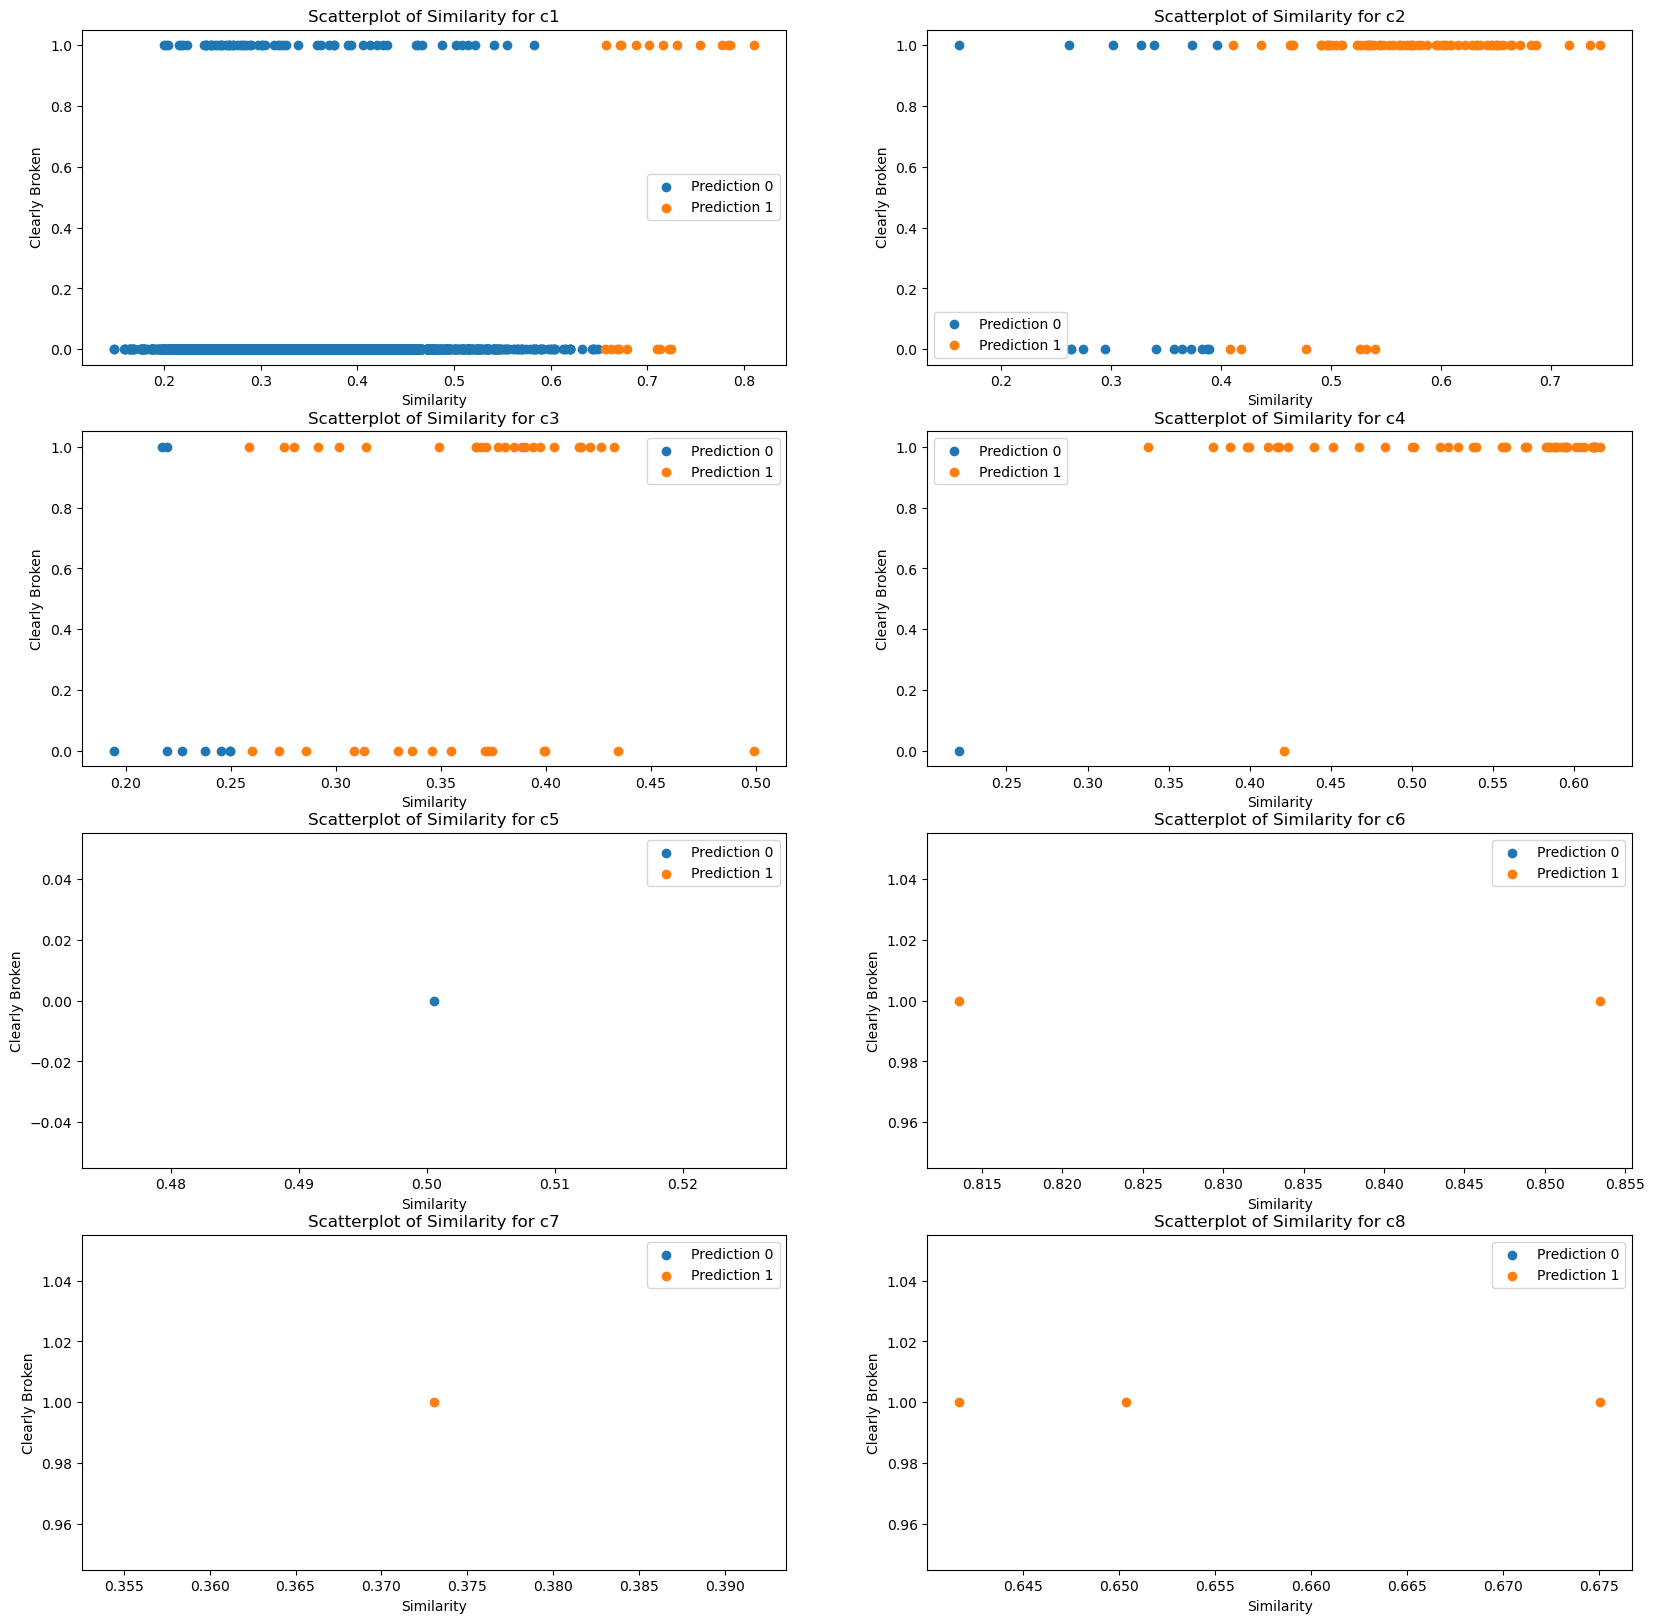

In [207]:
# get f1 score on 6p data
fig, axes = plt.subplots(4, 2, figsize=(20, 20))
cluster_f1 = {}
i = 0
for cluster in cluster_map.keys():
    cluster_data = anomaly[anomaly.cluster == cluster]
    cluster_data.loc[cluster_data.similarity>best_thresholds[cluster],'pred'] = 1
    anomaly.loc[(anomaly.cluster == cluster)&(anomaly.similarity>best_thresholds[cluster]),'pred'] = 1
    # predictions = np.ones(len(cluster_data), dtype=int)
    # cluster_f1[cluster] = f1_score(cluster_data['clearly_broken'], predictions)
# for ax, (group_name, group_data) in zip(axes.flatten(), anomaly.groupby('cluster')):
    ax = axes[i // 2, i % 2]
    for pred in (0,1):
        subset = cluster_data[cluster_data['pred'] == pred]
        ax.scatter(subset['similarity'], subset['clearly_broken'], label=f'Prediction {pred}')
    ax.set_ylabel('Clearly Broken')
    ax.set_xlabel('Similarity')
    ax.set_title(f'Scatterplot of Similarity for {cluster}')
    ax.legend()
    i += 1
plt.show()


In [208]:
f1_score(anomaly.clearly_broken, anomaly.pred)

0.7414634146341464

In [212]:
anomaly[anomaly.pred==1]['clearly_broken'].sum()

152

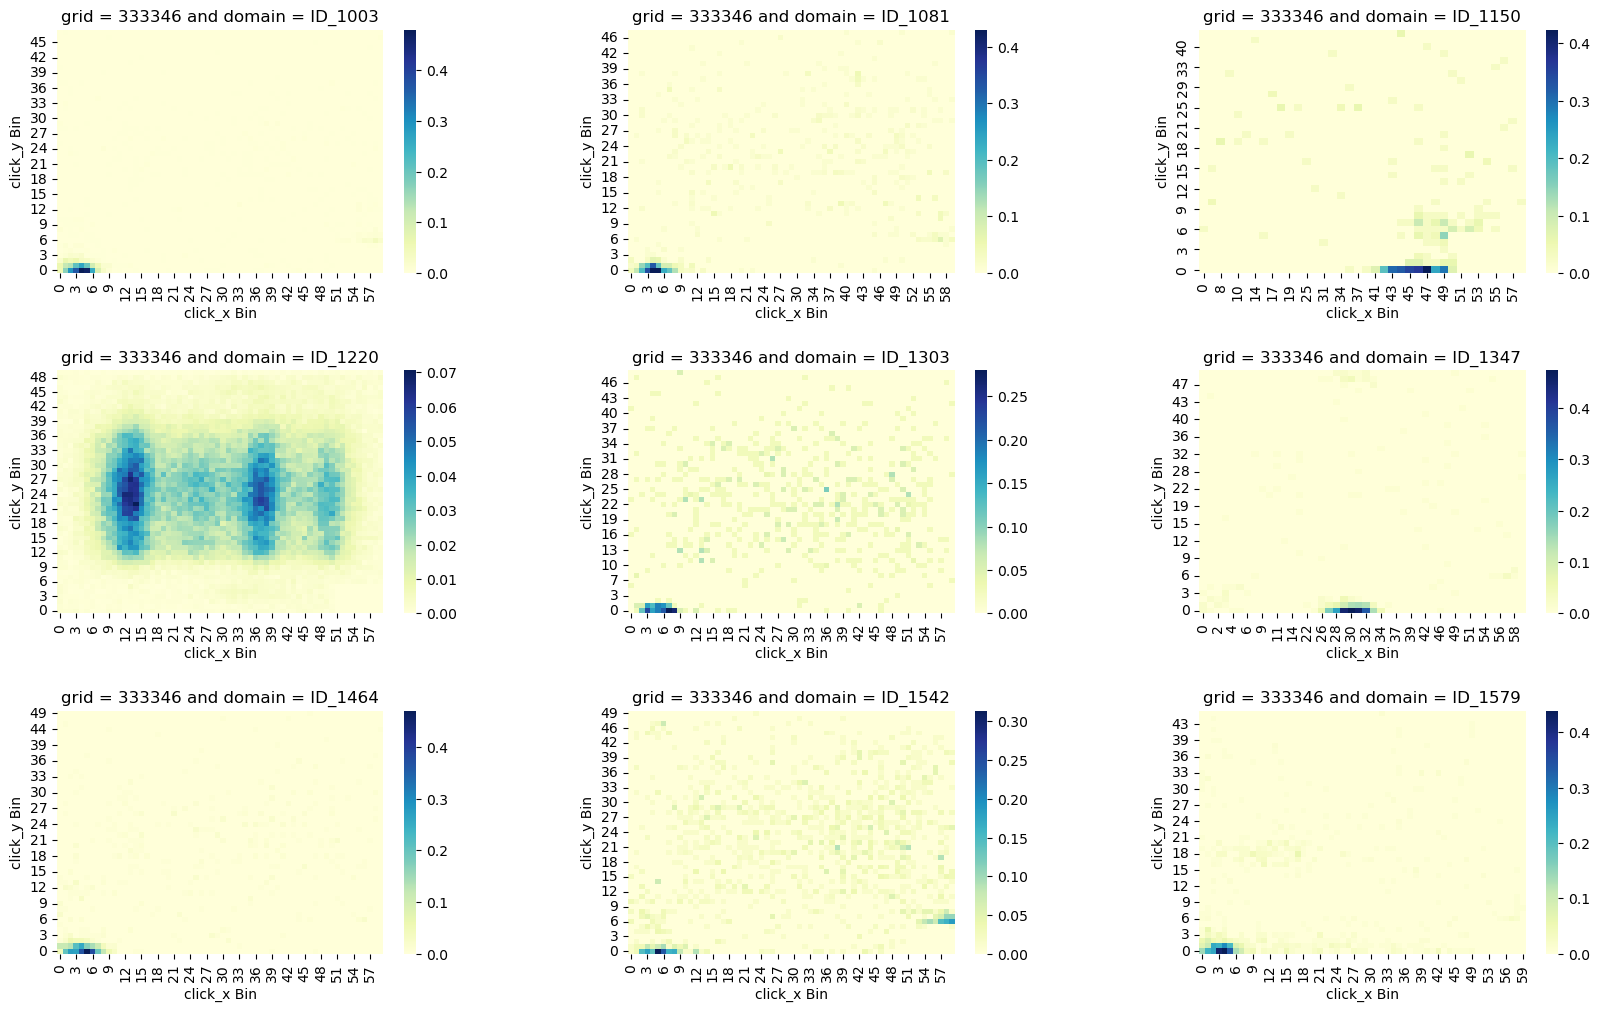

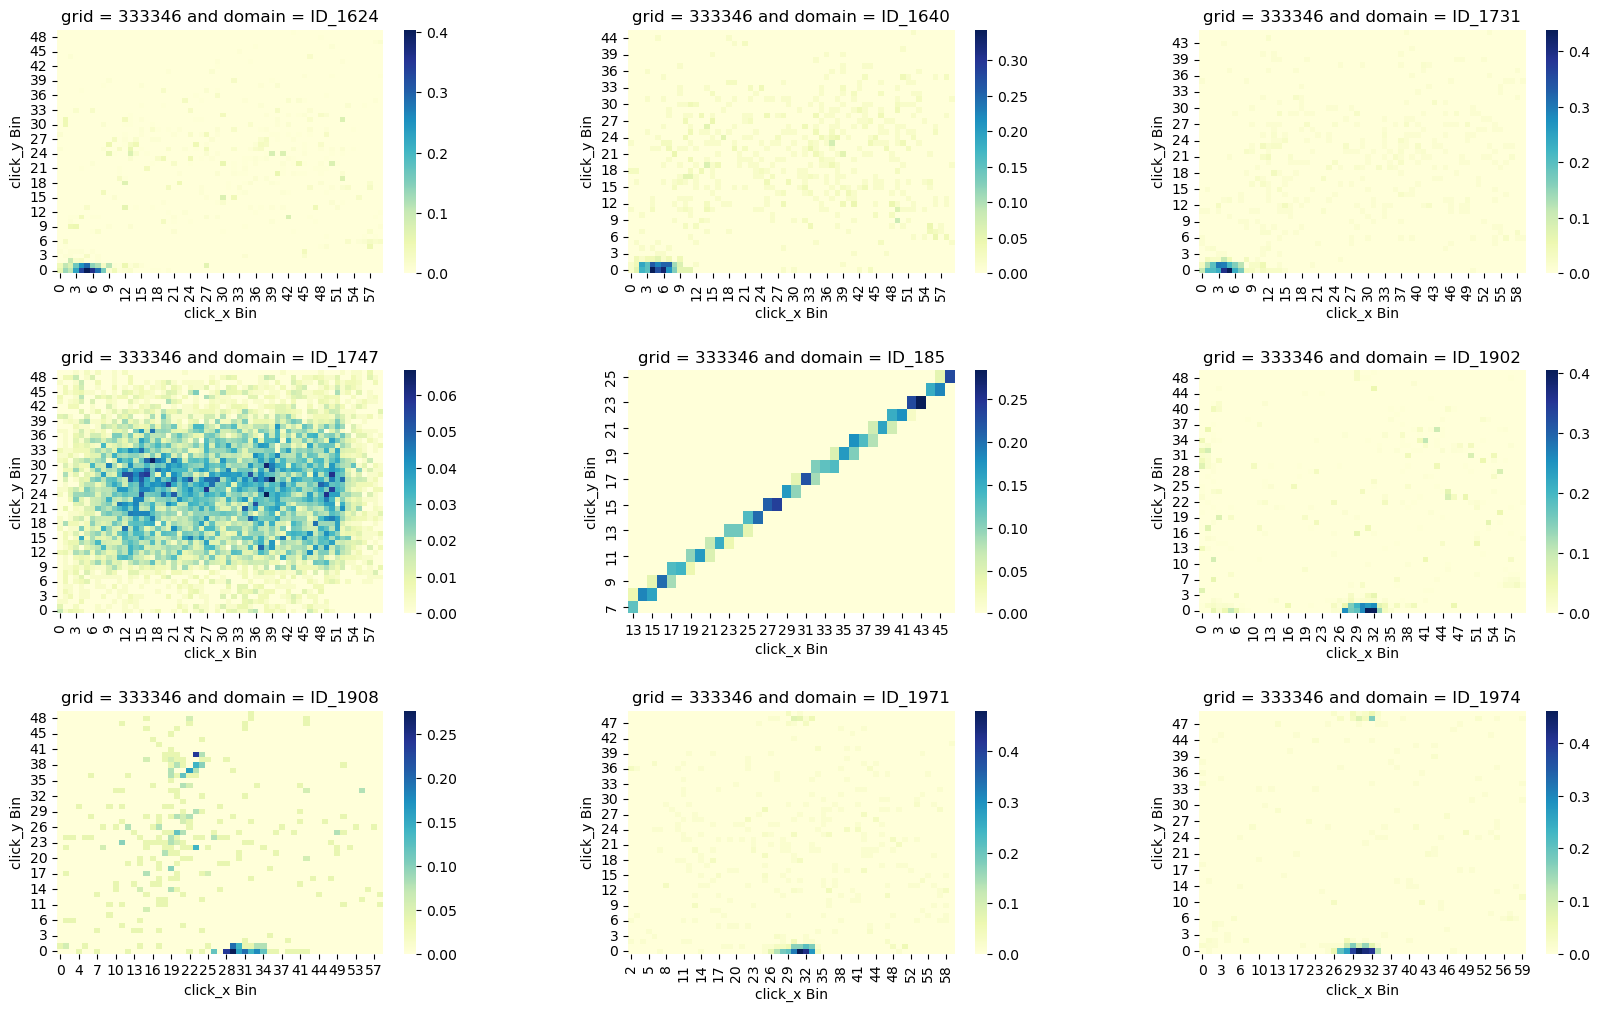

KeyboardInterrupt: 

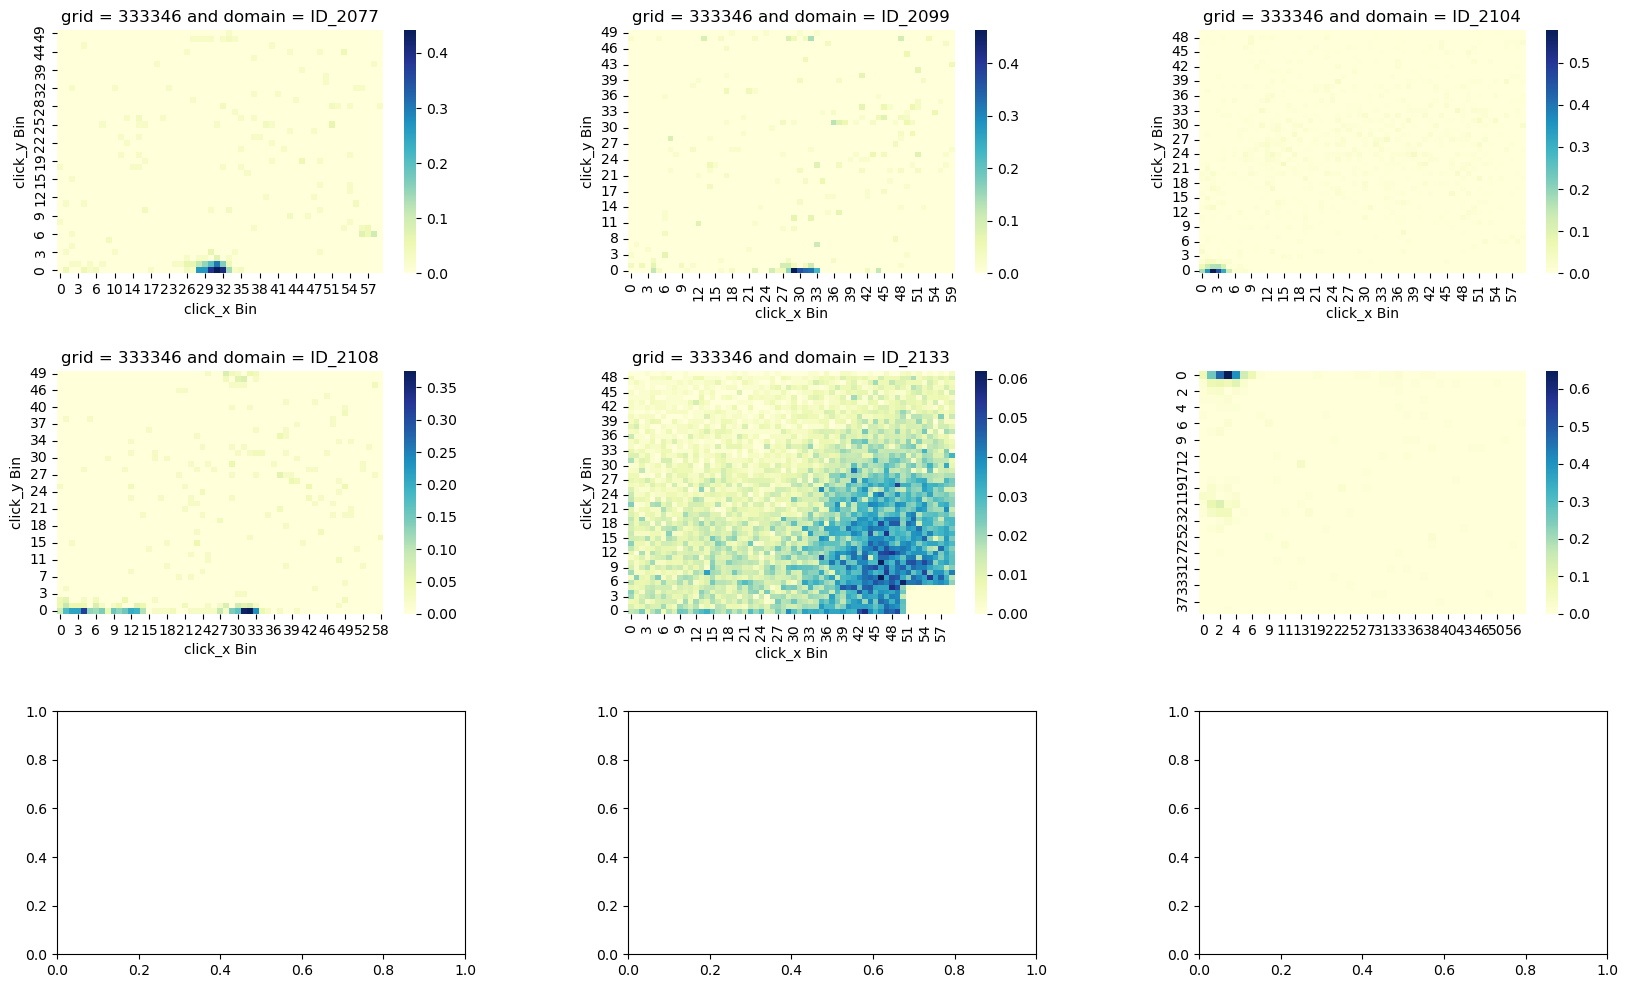

In [209]:
plot_anomaly(3,3,anomaly[anomaly.pred==1][['grid_id','domain']].to_numpy(), df_new)

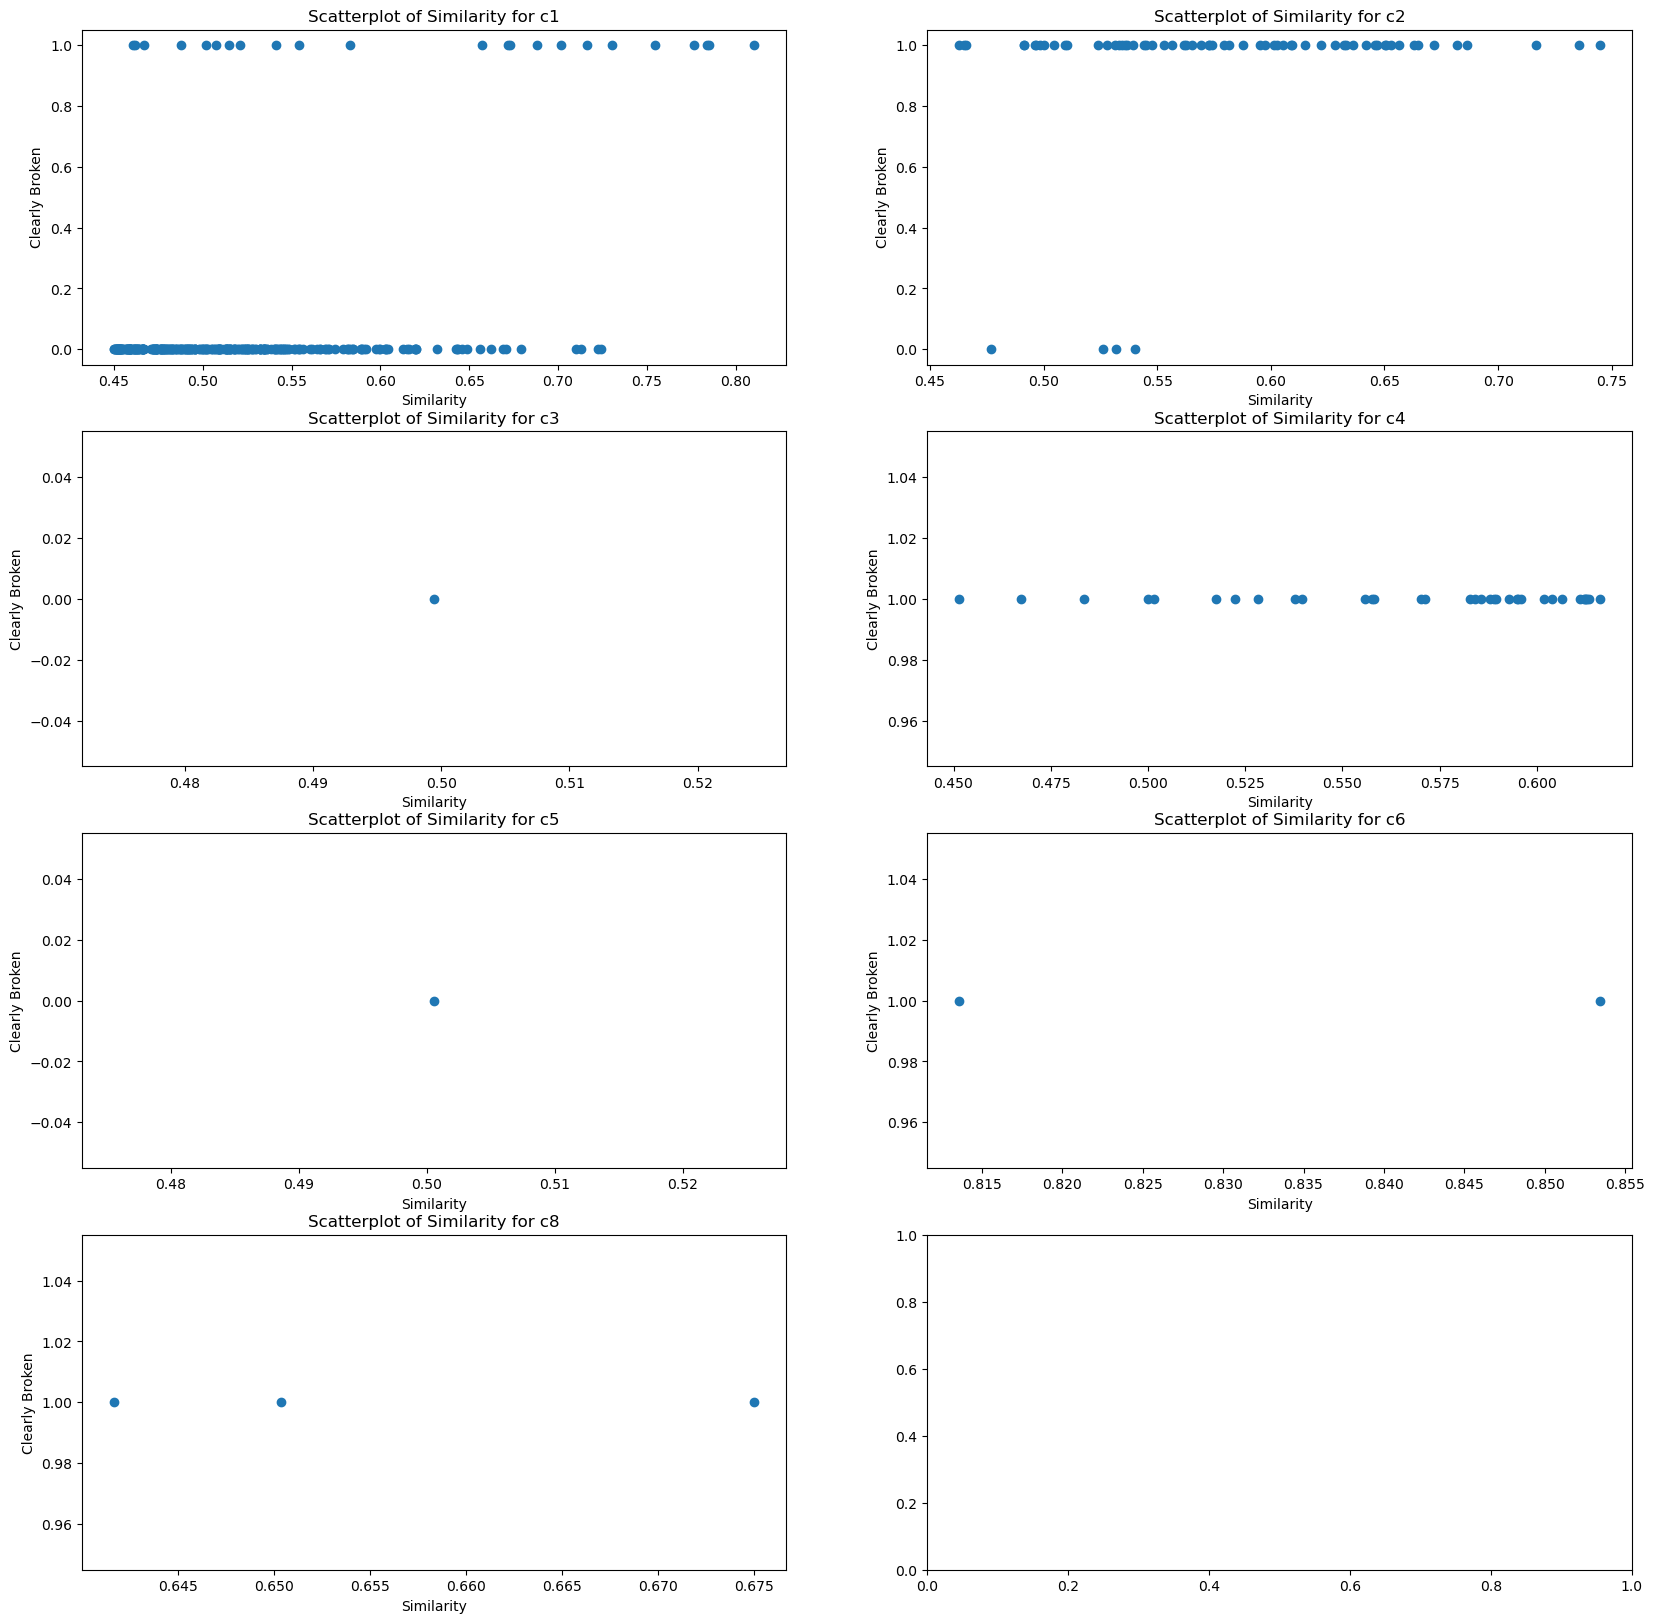

In [ ]:
# fig, axes = plt.subplots(4, 2, figsize=(20, 20))
# for ax, (group_name, group_data) in zip(axes.flatten(), anomaly.groupby('cluster')):
#     ax.scatter(group_data['similarity'], group_data['clearly_broken'])
#     ax.set_ylabel('Clearly Broken')
#     ax.set_xlabel('Similarity')
#     ax.set_title(f'Scatterplot of Similarity for {group_name}')
# plt.show()
